All project used , significant features used

In [103]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

Load Data

In [104]:
# Import pandas libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("Data/activemq_result.csv", delimiter=',')

# Explore the dataset
print(data.head()) 



                                         Method name  C20  C3  C4  C1  C5  C6  \
0  org.apache.activemq.transport.amqp.AmqpFramePa...    4  10   1   9   2   5   
1  org.apache.activemq.transport.amqp.AmqpHeader....    5   6   0   6   1   3   
2  org.apache.activemq.transport.amqp.AmqpHeader....    1  13   0  13   3   9   
3  org.apache.activemq.transport.amqp.AmqpInactiv...    1   5   0   5   1   3   
4  org.apache.activemq.transport.amqp.AmqpInactiv...    6   9   0   9   1   5   

   C2  C21  C18  ...  H4  H1  H2  H3       H12       H13       H14   H15  H5  \
0   0    2    4  ...   1   2   2   4  0.200000  0.200000  1.000000   4.0   1   
1   0    5    2  ...   1   1   3   4  0.333333  1.000000  0.333333   4.0   1   
2   0    9    3  ...   1  10   0  10  0.769231  0.000000  0.000000  10.0   1   
3   0    3    1  ...   1   2   0   2  0.400000  0.000000  0.000000   2.0   1   
4   0    4    3  ...   1   3   2   5  0.333333  0.222222  1.500000   5.0   1   

       bug-prone  
0  not bug-pr

In [105]:
import pandas as pd
import glob

# Path to the directory containing your CSV files
file_path = "Train/*.csv"  # Use a wildcard to match all CSV files in the directory

# Get all file paths matching the pattern
all_files = glob.glob(file_path)

# Initialize an empty list to store DataFrames
data_list = []

# Read and combine files
for i, file in enumerate(all_files):
    if i == 0:
        # Include header only for the first file
        df = pd.read_csv(file, delimiter=',')
        print(df.shape)
    else:
        # Skip the header row for subsequent files
        df = pd.read_csv(file, delimiter=',', header=0)
        print(df.shape)
    data_list.append(df)

# Concatenate all DataFrames
combined_data = pd.concat(data_list, ignore_index=True)

# print(f"Loaded {len(all_files)} files.")
# print(combined_data.head())  # Display first few rows of the combined dataset


(4016, 42)
(619, 42)
(965, 42)
(12081, 42)
(1883, 42)
(6415, 42)
(2187, 42)
(2438, 42)
(473, 42)
(1873, 42)
(2238, 42)
(908, 42)
(1167, 42)
(629, 42)
(3936, 42)


In [106]:
# for file in all_files:
#     dfs = pd.read_csv(file, delimiter=',')
#     if 'Number of Modified Parameters Prefix' in dfs.columns:
#         print(f"File {file} contains the 'Number of Modified Parameters Prefix' column.")

# for file in all_files:
#     dfs = pd.read_csv(file, delimiter=',')
#     print(f"File {file} : ")
#     print(f"columns : {dfs.columns}")

data = combined_data.copy()

print(data.shape)

(41828, 42)


Prepocessing

In [107]:
# Check missing value
data.isna().sum() # get missing value count of each column

# check missing values
data.isnull().values.any() # no missing values


False

In [108]:
import numpy as np

data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check missing value
data.isna().sum() # get missing value count of each column

Method name    0
C20            0
C3             0
C4             0
C1             0
C5             0
C6             0
C2             0
C21            0
C18            0
C8             0
C9             0
C10            0
C17            0
C19            0
C7             0
C11            0
C12            0
C13            0
C14            0
C15            0
C16            0
H6             0
H7             0
H8             0
H9             0
H10            0
H11            0
H16            0
H17            0
H18            0
H19            0
H4             0
H1             0
H2             0
H3             0
H12            0
H13            0
H14            0
H15            0
H5             0
bug-prone      0
dtype: int64

Split to Small and Large

In [109]:
import numpy as np
import pandas as pd

# Calculate percentiles
c1_50 = np.percentile(data['C1'], 50)

# Subset 1: small: C1 < 50th percentile
data_s = data[data['C1'] < c1_50]

# Subset 2: large: C1 >= 50th percentile
data_l = data[data['C1'] >= c1_50]


Transformation

In [110]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

def plot_all_distributions(df):
    # Number of columns in the dataframe
    num_features = df.shape[1]
    
    
    # Create a figure with subplots
    fig, axes = plt.subplots(8, 5, figsize=(15, 24))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each feature
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=True, stat="density", bins=30, color='blue', alpha=0.6, ax=axes[i])
        sns.kdeplot(df[column], color='red', linewidth=2, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    # Hide any unused subplots
    for i in range(len(df.columns), len(axes)):
        axes[i].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Select numerical columns only
df_s = data_s.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')
df_l = data_l.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')



In [111]:
print(len(df_s))
# 1881

print(len(df_l))
# 2135

20111
21717


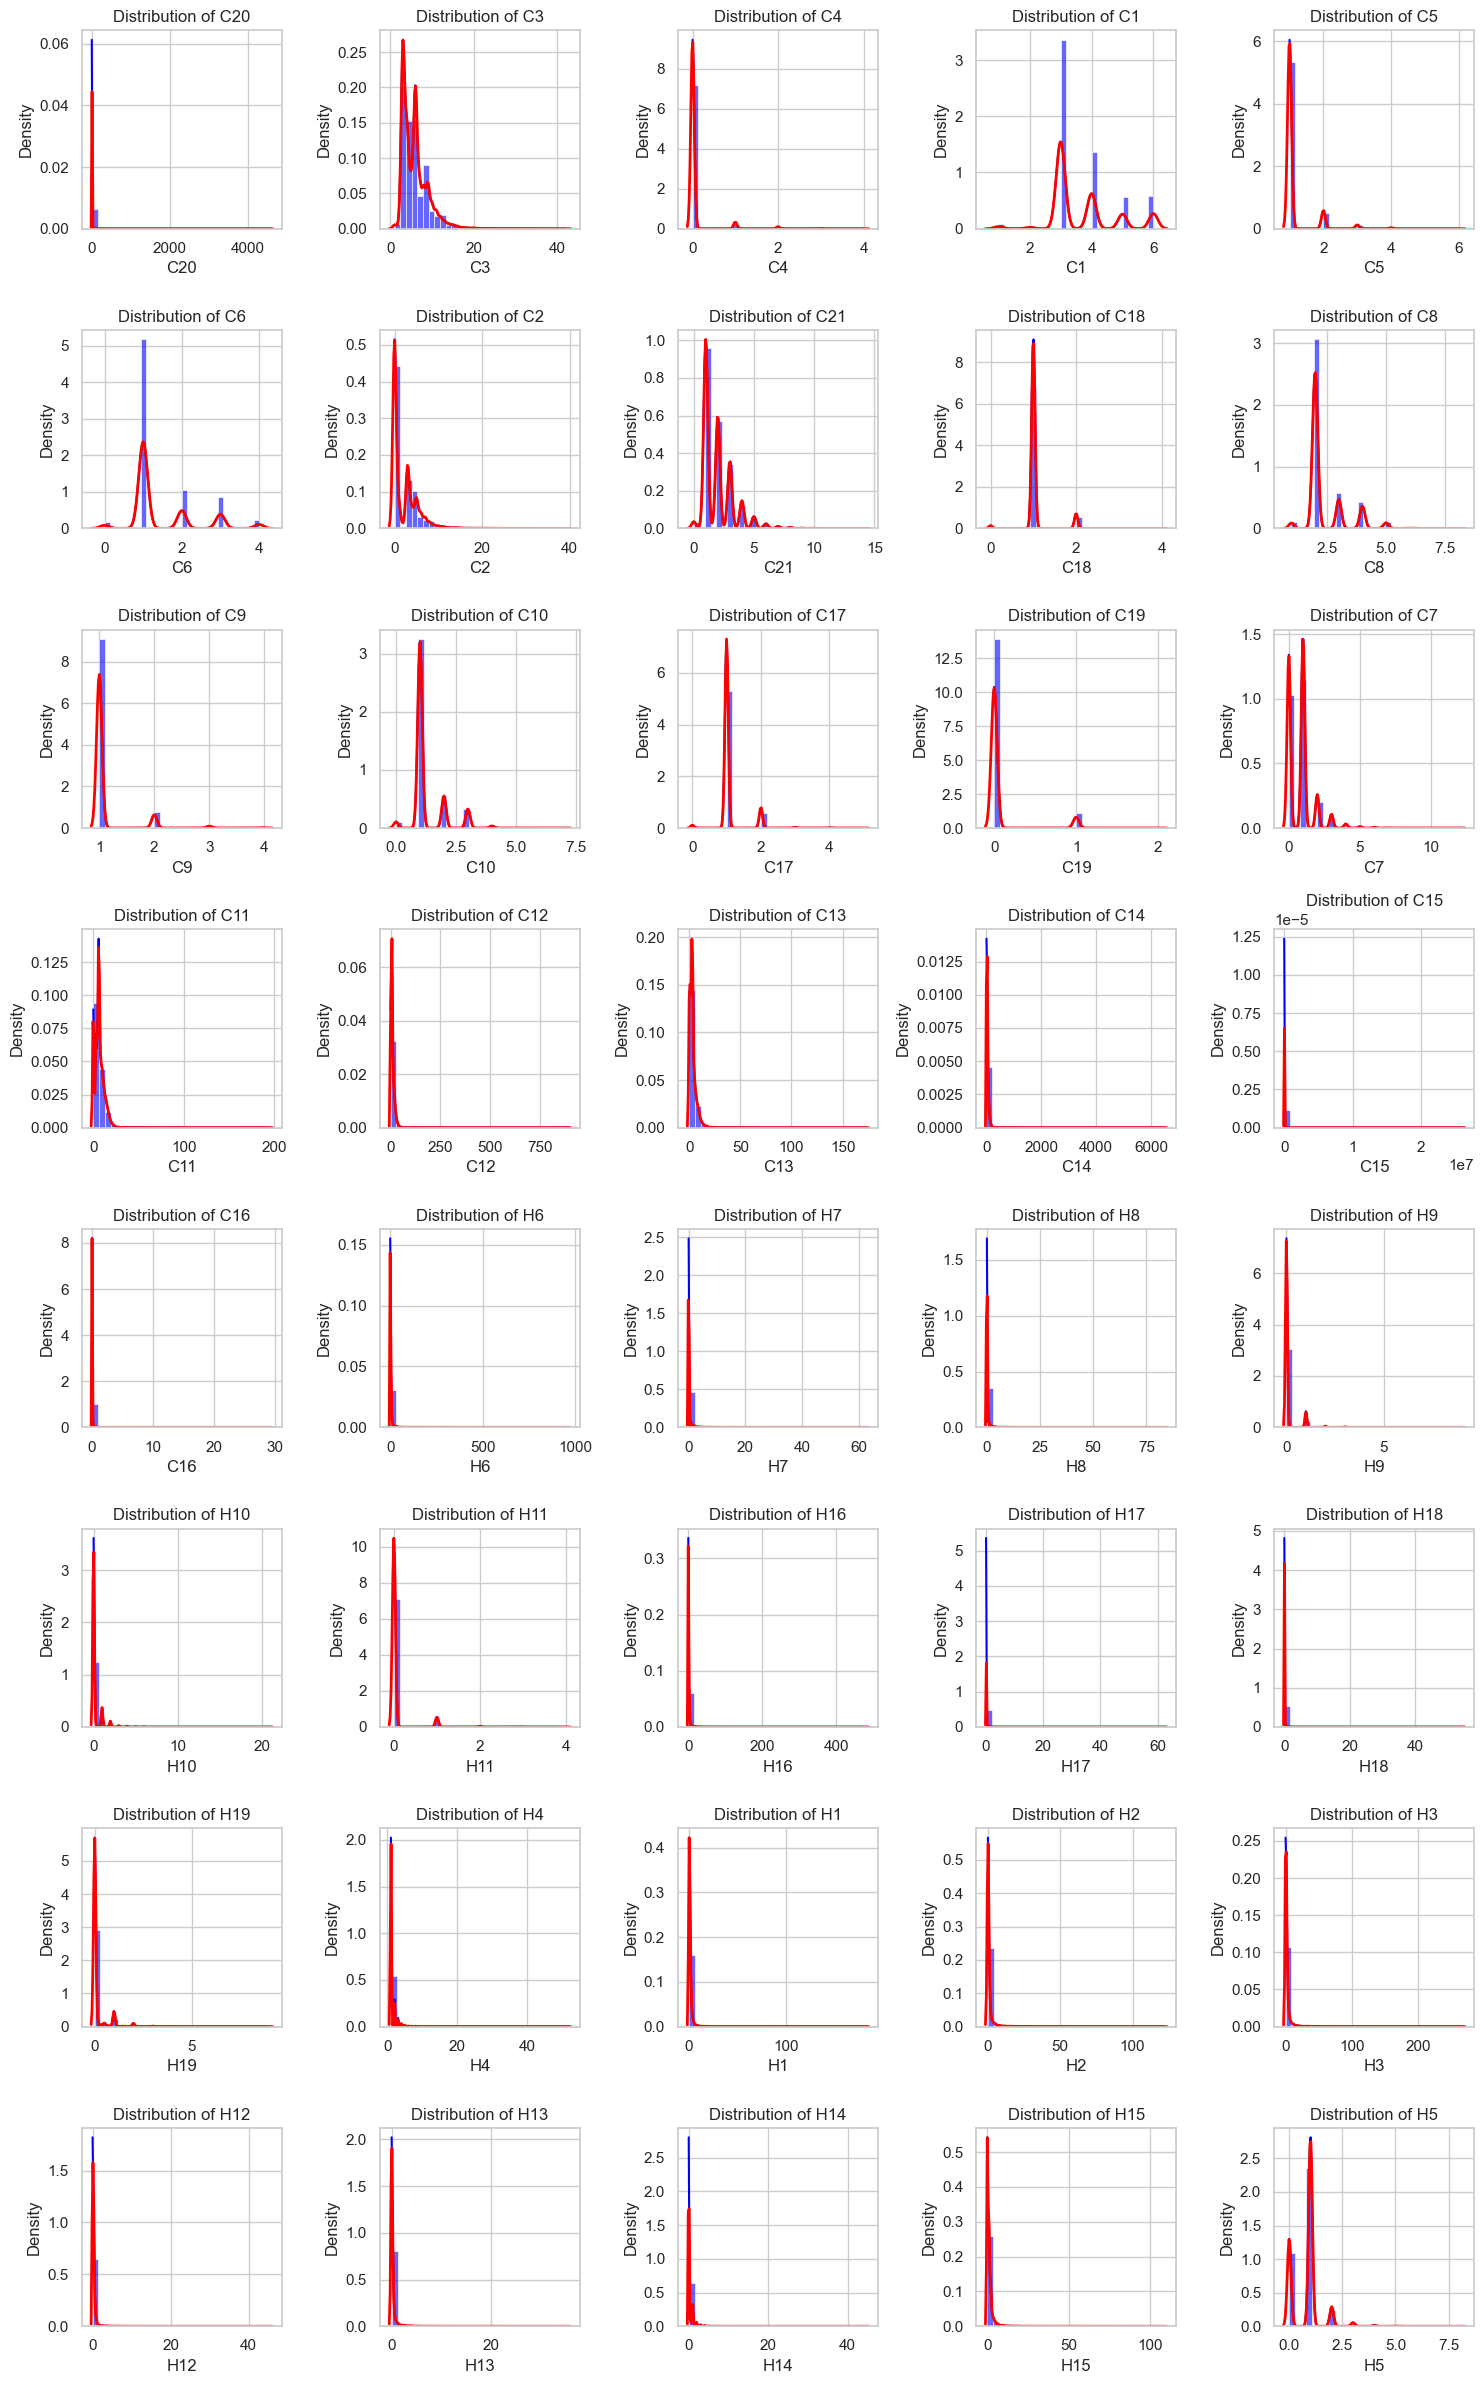

In [9]:
# Plot all distributions
plot_all_distributions(df_s)

array([[<Axes: title={'center': 'C20'}>, <Axes: title={'center': 'C3'}>,
        <Axes: title={'center': 'C4'}>, <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'C5'}>, <Axes: title={'center': 'C6'}>],
       [<Axes: title={'center': 'C2'}>, <Axes: title={'center': 'C21'}>,
        <Axes: title={'center': 'C18'}>, <Axes: title={'center': 'C8'}>,
        <Axes: title={'center': 'C9'}>, <Axes: title={'center': 'C10'}>],
       [<Axes: title={'center': 'C17'}>, <Axes: title={'center': 'C19'}>,
        <Axes: title={'center': 'C7'}>, <Axes: title={'center': 'C11'}>,
        <Axes: title={'center': 'C12'}>, <Axes: title={'center': 'C13'}>],
       [<Axes: title={'center': 'C14'}>, <Axes: title={'center': 'C15'}>,
        <Axes: title={'center': 'C16'}>, <Axes: title={'center': 'H6'}>,
        <Axes: title={'center': 'H7'}>, <Axes: title={'center': 'H8'}>],
       [<Axes: title={'center': 'H9'}>, <Axes: title={'center': 'H10'}>,
        <Axes: title={'center': 'H11'}>, <Axes:

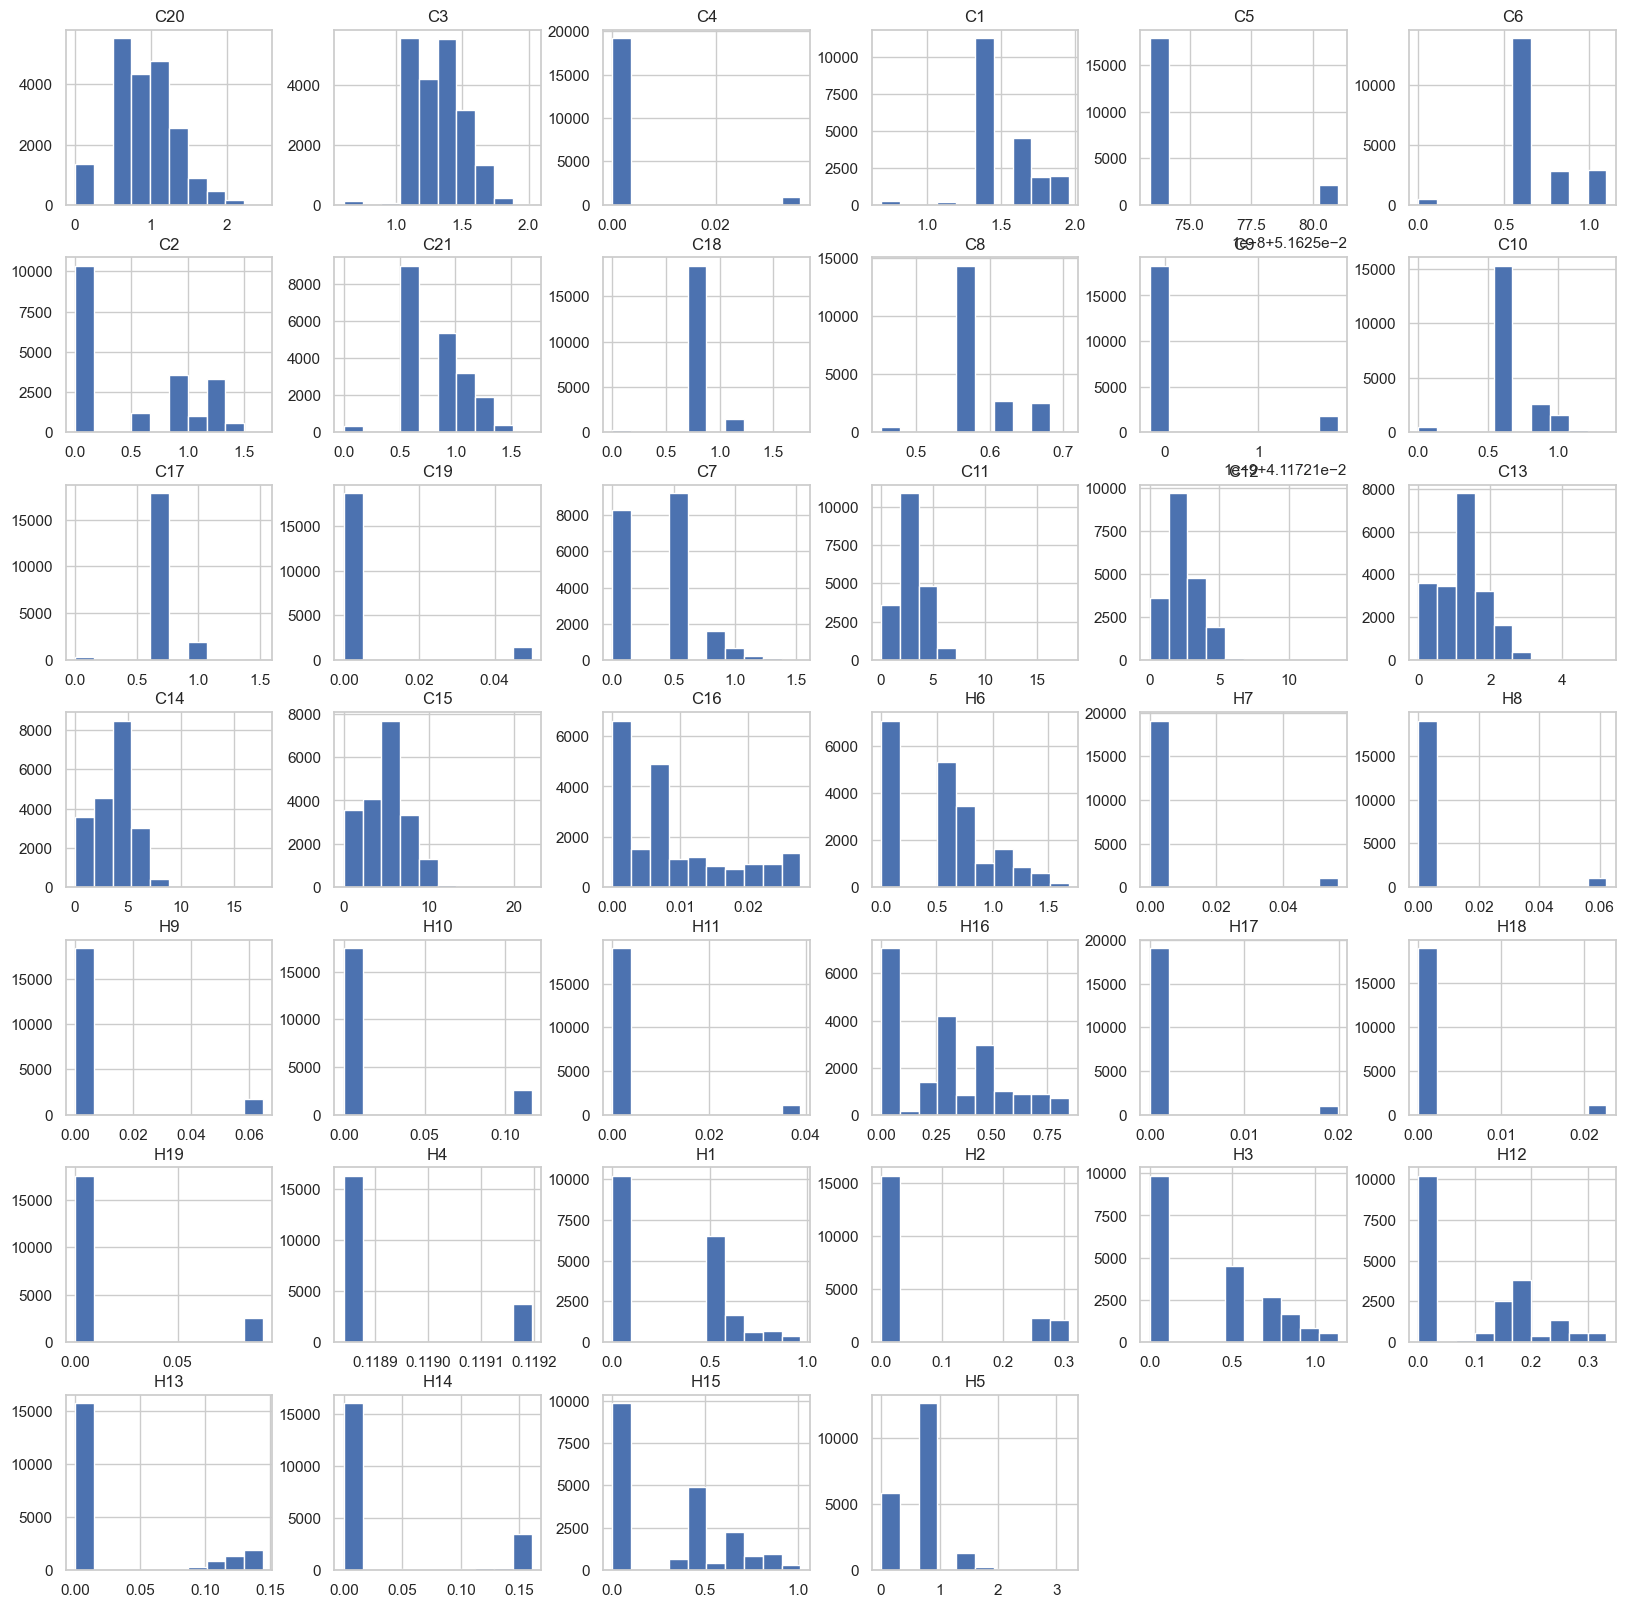

In [112]:

# copy data
data_transform_s = data_s.copy()


# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
from scipy import stats

# Apply Box-Cox transformation to each variable
for var in df_s.columns:
    # Adding 1 to handle zero values
    transformed, _ = stats.boxcox(data_transform_s[var] + 1)
    data_transform_s[var] = transformed


# Check the distribution after transformation
data_transform_s[df_s.columns].hist(figsize=(20, 20))


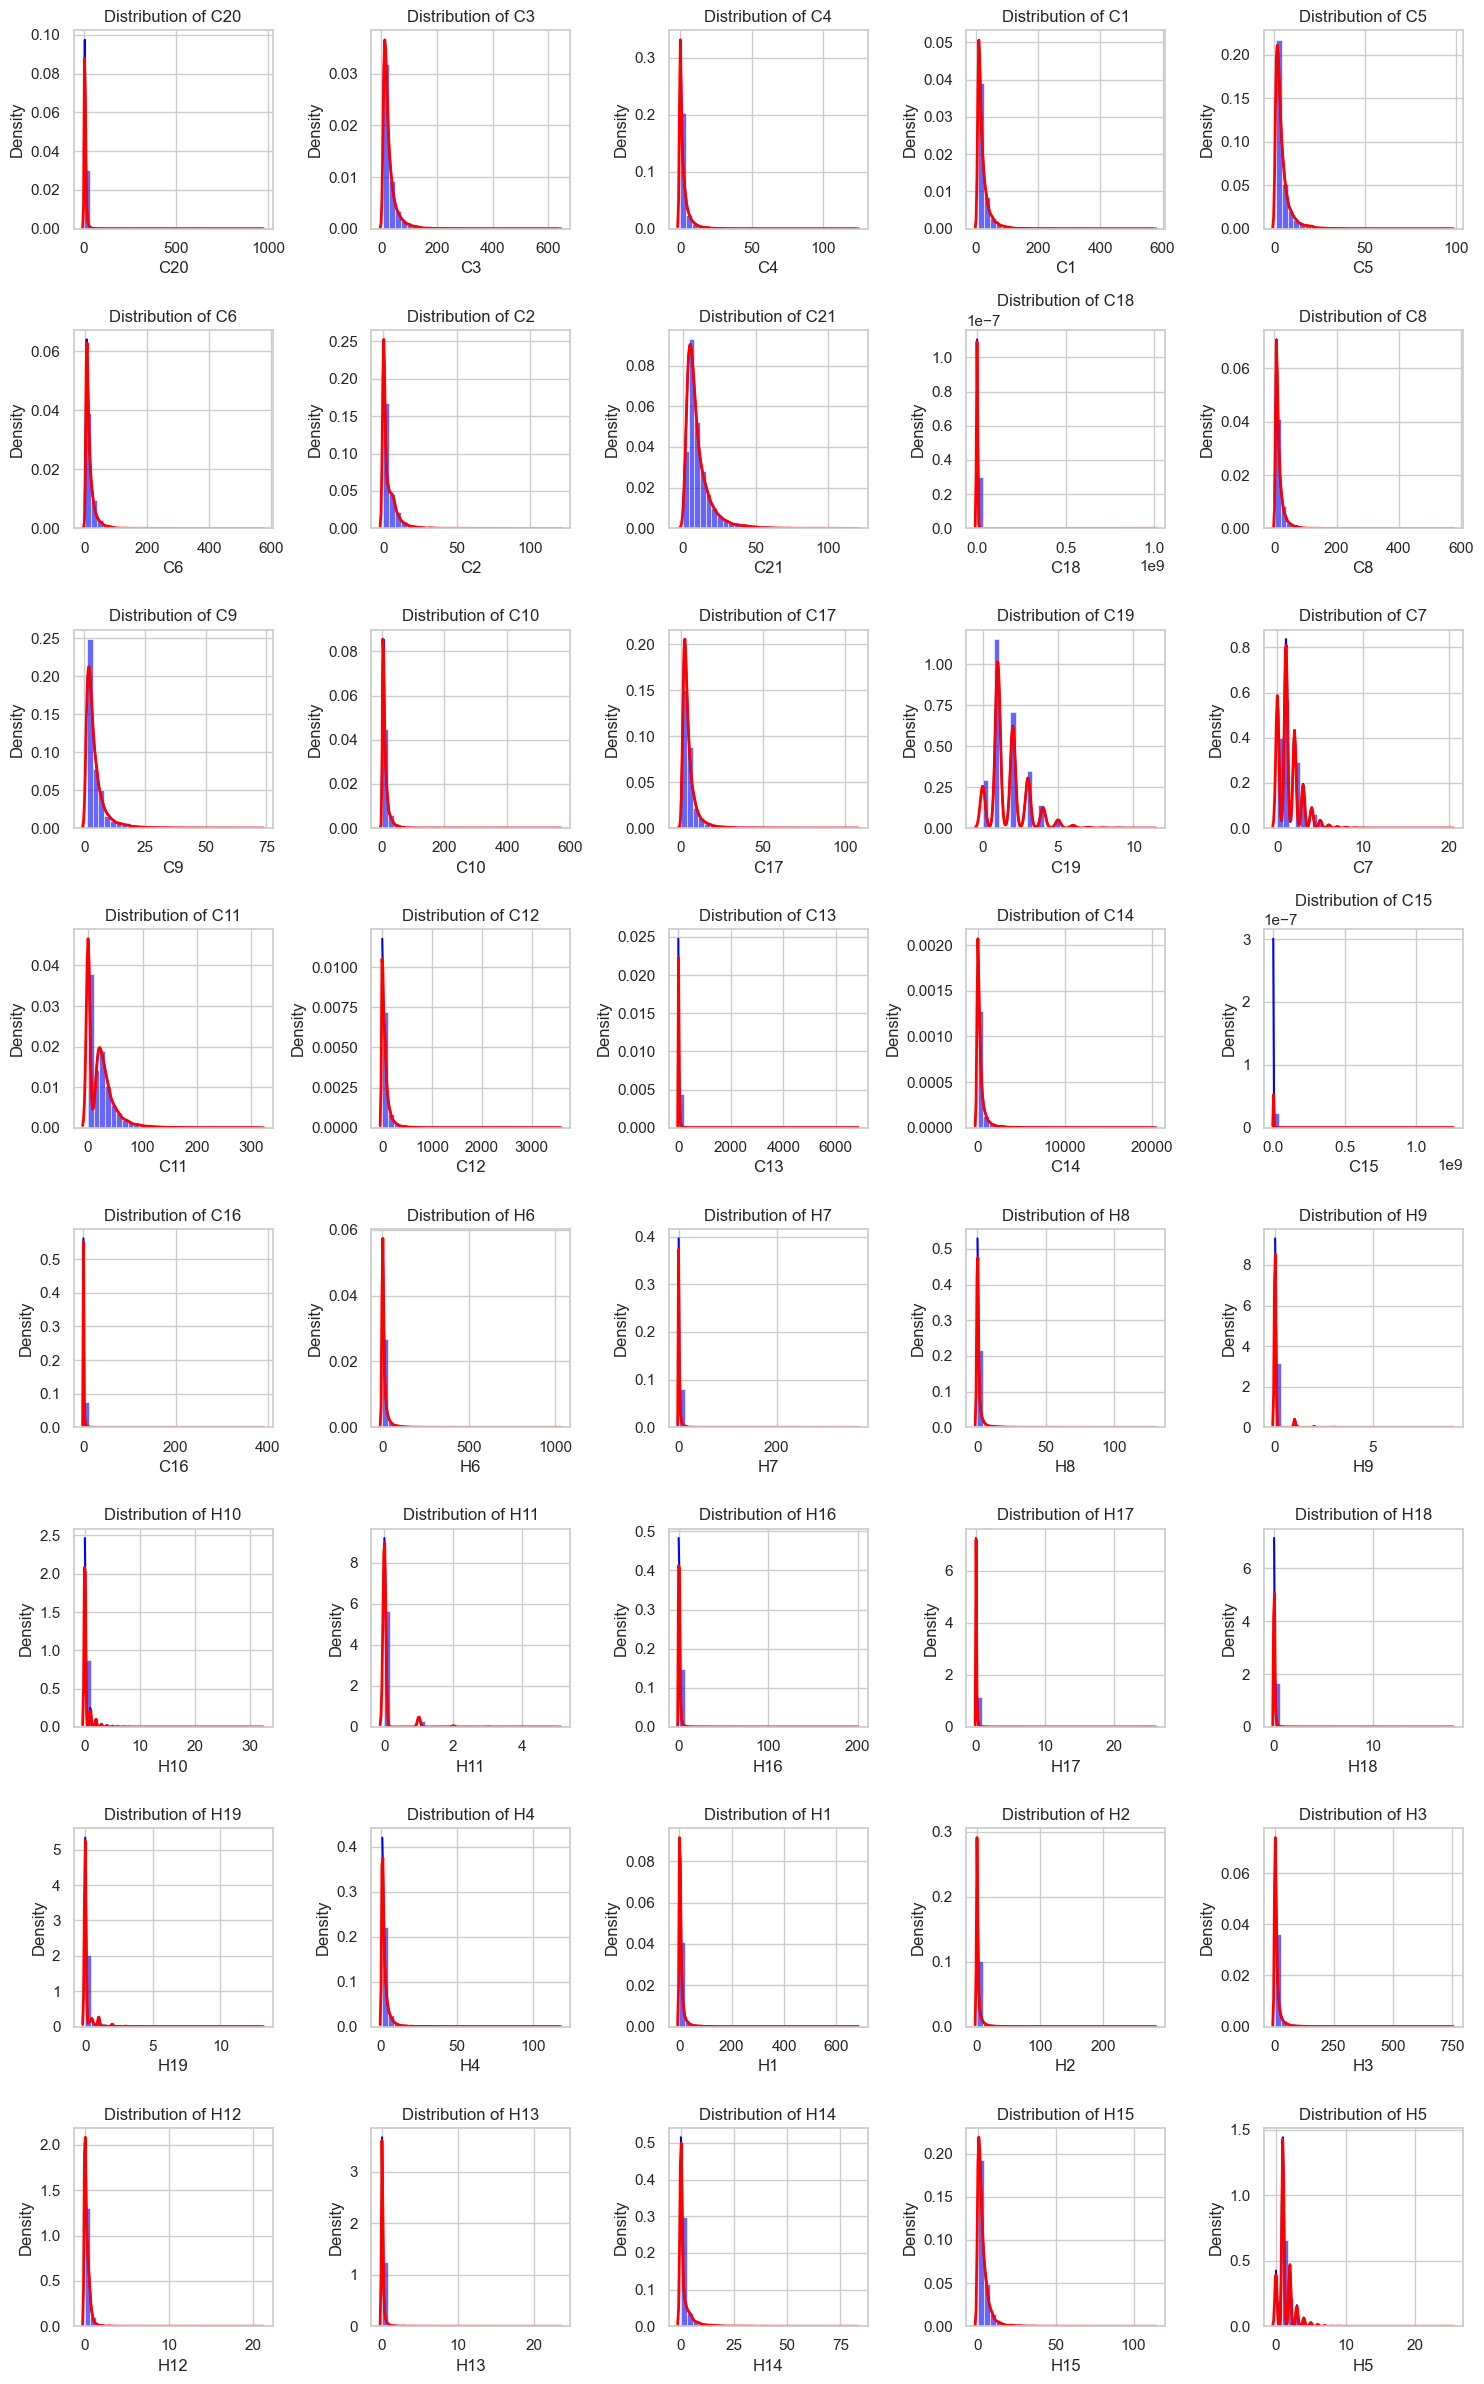

In [11]:
# Plot all distributions
plot_all_distributions(df_l)

array([[<Axes: title={'center': 'C20'}>, <Axes: title={'center': 'C3'}>,
        <Axes: title={'center': 'C4'}>, <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'C5'}>, <Axes: title={'center': 'C6'}>],
       [<Axes: title={'center': 'C2'}>, <Axes: title={'center': 'C21'}>,
        <Axes: title={'center': 'C18'}>, <Axes: title={'center': 'C8'}>,
        <Axes: title={'center': 'C9'}>, <Axes: title={'center': 'C10'}>],
       [<Axes: title={'center': 'C17'}>, <Axes: title={'center': 'C19'}>,
        <Axes: title={'center': 'C7'}>, <Axes: title={'center': 'C11'}>,
        <Axes: title={'center': 'C12'}>, <Axes: title={'center': 'C13'}>],
       [<Axes: title={'center': 'C14'}>, <Axes: title={'center': 'C15'}>,
        <Axes: title={'center': 'C16'}>, <Axes: title={'center': 'H6'}>,
        <Axes: title={'center': 'H7'}>, <Axes: title={'center': 'H8'}>],
       [<Axes: title={'center': 'H9'}>, <Axes: title={'center': 'H10'}>,
        <Axes: title={'center': 'H11'}>, <Axes:

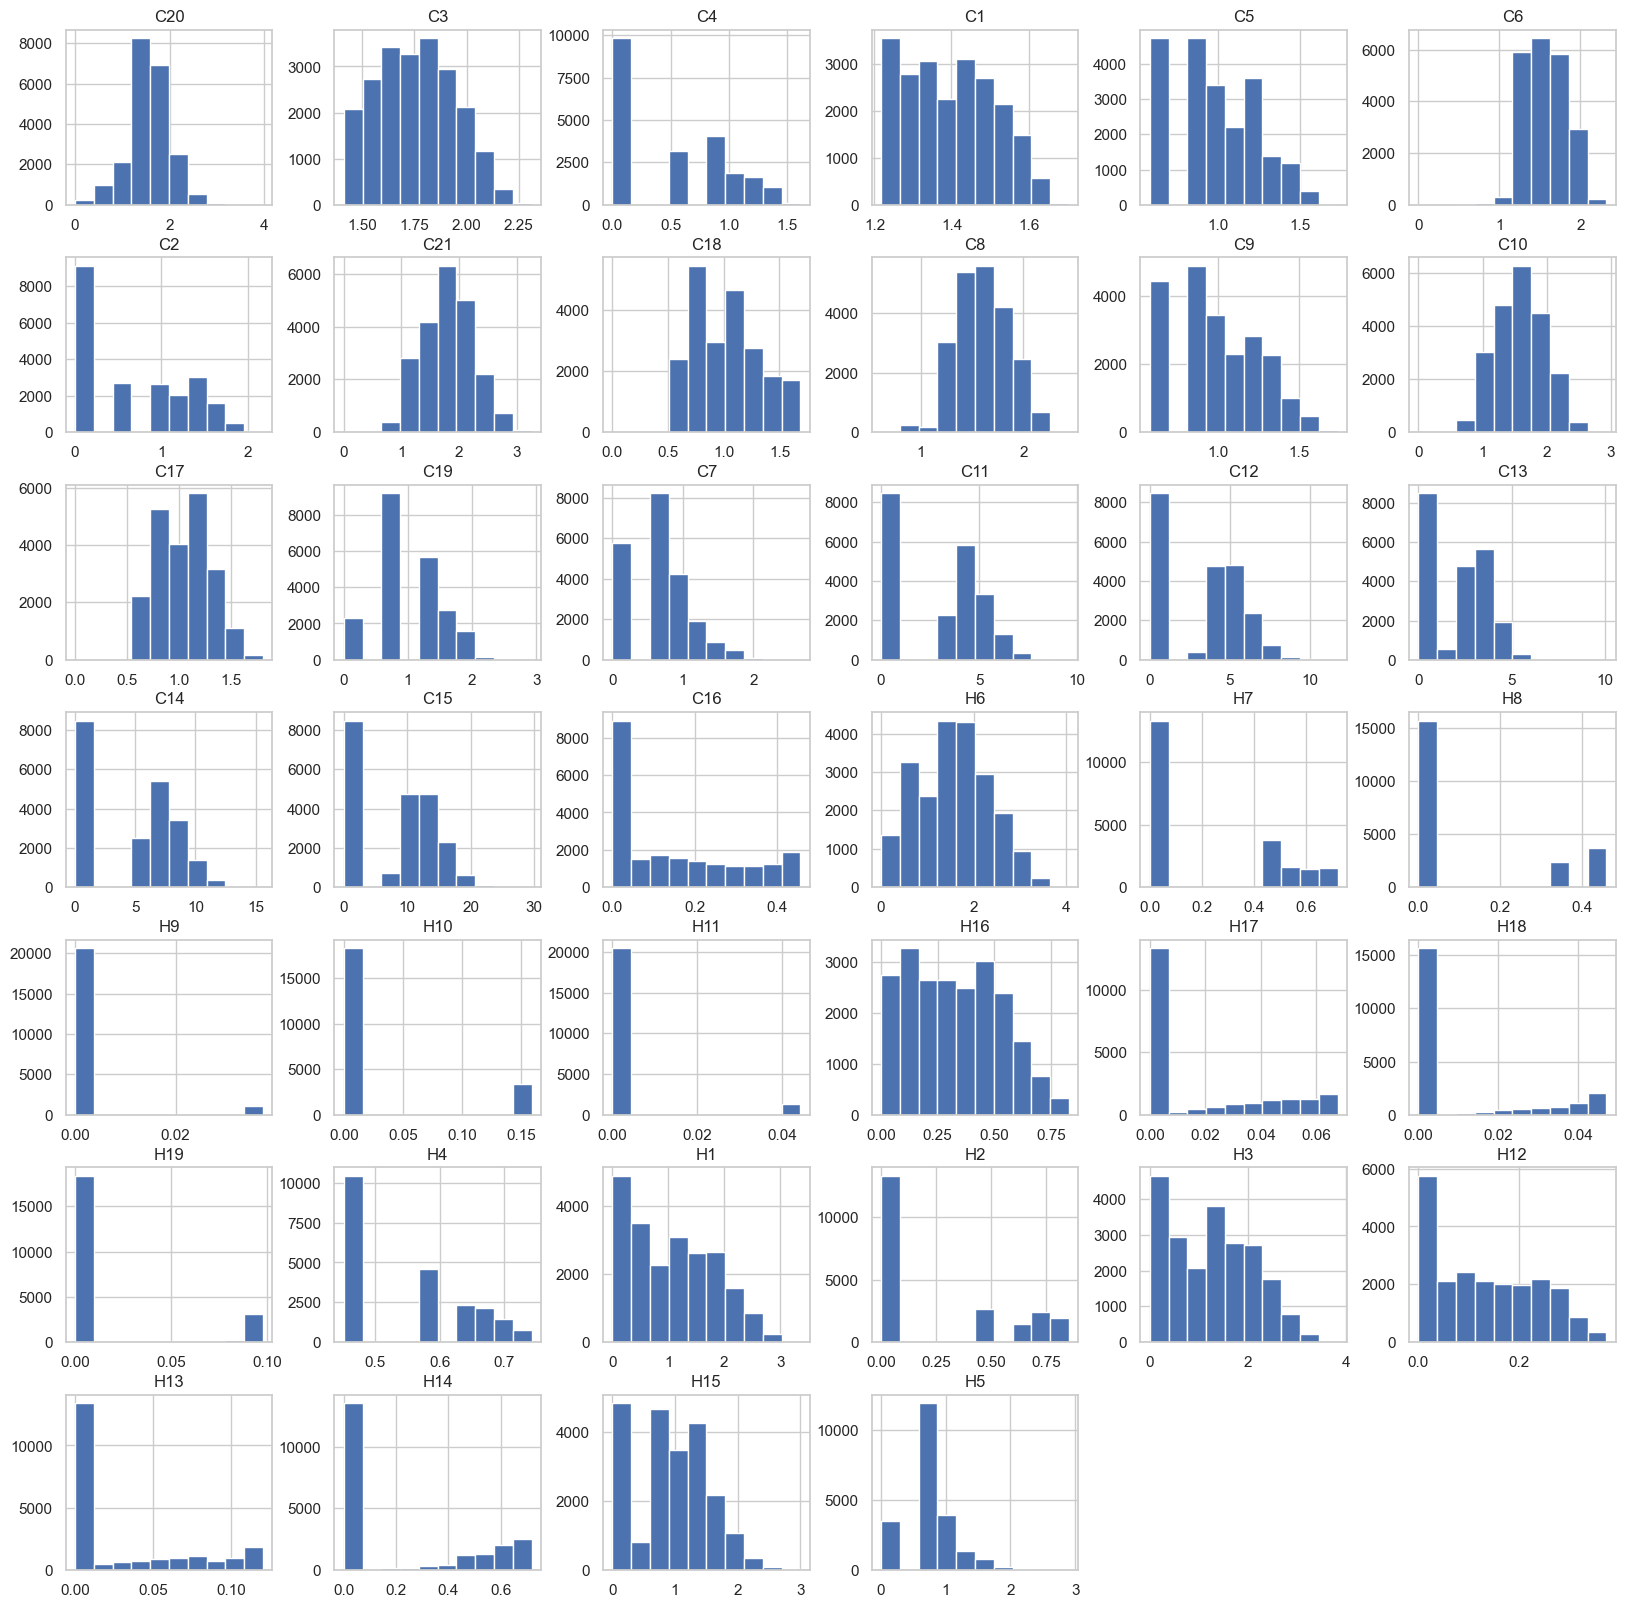

In [113]:

# copy data
data_transform_l = data_l.copy()

# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
from scipy import stats

# Apply Box-Cox transformation to each variable
for var in df_l.columns:
    # Adding 1 to handle zero values
    transformed, _ = stats.boxcox(data_transform_l[var] + 1)
    data_transform_l[var] = transformed


# Check the distribution after transformation
data_transform_l[df_l.columns].hist(figsize=(20, 20))


In [114]:

# Convert 'bug-prone' column to 0 and 1
data_transform_s['bug-prone'] = data_transform_s['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)
data_transform_l['bug-prone'] = data_transform_l['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)

# Display the updated DataFrame
print(data_transform_s.head())  
print(data_transform_l.head()) 


                                          Method name       C20        C3  \
1   org.apache.activemq.transport.amqp.AmqpHeader....  1.291390  1.384069   
3   org.apache.activemq.transport.amqp.AmqpInactiv...  0.607779  1.307225   
8   org.apache.activemq.transport.amqp.AmqpInactiv...  1.291390  1.307225   
9   org.apache.activemq.transport.amqp.AmqpNioSslT...  1.072262  1.082712   
10  org.apache.activemq.transport.amqp.AmqpNioSslT...  0.607779  1.384069   

     C4        C1        C5        C6   C2       C21       C18  ...        H4  \
1   0.0  1.957656  0.051626  0.997368  0.0  1.294479  1.164825  ...  0.118840   
3   0.0  1.801715  0.051626  0.997368  0.0  1.074304  0.719126  ...  0.118840   
8   0.0  1.801715  0.051626  0.997368  0.0  1.199713  0.719126  ...  0.118840   
9   0.0  1.392249  0.051626  0.584965  0.0  0.608385  0.719126  ...  0.119195   
10  0.0  1.957656  0.051626  0.997368  0.0  0.895884  1.164825  ...  0.118840   

          H1        H2        H3       H12       H

In [115]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# split feature data and target data
feature_X_s = data_transform_s.drop(columns=['Method name','bug-prone'])
y_s = data_transform_s['bug-prone']

feature_X_l = data_transform_l.drop(columns=['Method name','bug-prone'])
y_l = data_transform_l['bug-prone']

Split traing and testing data

In [116]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing sets (20%)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(feature_X_s, y_s, test_size=0.2, random_state=42)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(feature_X_l, y_l, test_size=0.2, random_state=42)

Scaling

In [117]:
# StandardScaler performs Z-score standardization, which centers the data (mean = 0) 
# and scales it to unit variance (std = 1).
# The best practice is to apply the scaler only on the training set and then use the same transformation parameters to 
# scale the test set. 

from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

scaler_l = StandardScaler()
X_train_scaled_l = scaler_l.fit_transform(X_train_l)
X_test_scaled_l = scaler_l.transform(X_test_l)


Feature selecting

In [118]:
from sklearn.feature_selection import f_classif, SelectKBest

f_values, p_values = f_classif(X_train_scaled_s, y_train_s)
print("Small:")
print("F-values:", f_values)
print("P-values:", p_values)

f_values, p_values = f_classif(X_train_scaled_l, y_train_l)
print("Small:")
print("F-values:", f_values)
print("P-values:", p_values)


Small:
F-values: [1.23967388e+02 6.27727466e+00 1.58544700e-01 3.22216781e+02
 4.60242834e+01 1.38596097e+02 5.62298751e+01 2.87040095e+02
 2.51394626e+01 1.15402430e+02 3.31994476e+01 9.43326699e+01
 3.83378615e+01 2.61301070e+01 5.56990266e-01 5.63852330e+00
 4.56396459e+00 3.73505934e-03 7.32710358e+00 5.13085374e+00
 6.64022605e+01 1.05110142e+03 1.11826633e+02 2.06774902e+02
 3.53601496e+00 1.05690212e+00 1.07052855e+02 9.99140663e+02
 1.09703674e+02 2.03420766e+02 7.79215282e-01 1.11480547e+03
 2.40808880e+03 6.20537988e+02 2.17146978e+03 2.24386423e+03
 6.09121569e+02 6.75210250e+02 1.74604657e+03 2.88851520e+03]
P-values: [1.09026613e-028 1.22394044e-002 6.90505210e-001 2.36531675e-071
 1.20868625e-011 7.29447342e-032 6.78313249e-014 7.85092283e-064
 5.38975437e-007 7.92201168e-027 8.46954081e-009 3.06996906e-022
 6.09412430e-010 3.22827624e-007 4.55486365e-001 1.75816609e-002
 3.26664532e-002 9.51268277e-001 6.79941075e-003 2.35174052e-002
 3.94491614e-016 2.03227886e-223 4.74

In [119]:
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.feature_selection import SelectKBest

# Select features with p < 0.05
selector_s = SelectKBest(score_func=f_classif, k='all')
selector_s.fit(X_train_scaled_s, y_train_s)

# Mask for features with p < 0.05
significant_features_mask_s = selector_s.pvalues_ < 0.05
X_train_scaled_s_significant = X_train_scaled_s[:, significant_features_mask_s]

feature_names = feature_X_s.columns
print("Selected features small:", feature_names[significant_features_mask_s])

# Print unselected features
print("Unselected features small:", feature_names[~significant_features_mask_s])



# Select features with p < 0.05
selector_l = SelectKBest(score_func=f_classif, k='all')
selector_l.fit(X_train_scaled_l, y_train_l)

# Mask for features with p < 0.05
significant_features_mask_l = selector_l.pvalues_ < 0.05
X_train_scaled_l_significant = X_train_scaled_l[:, significant_features_mask_l]

# feature_names = feature_X_l.columns
print("Selected features large:", feature_names[significant_features_mask_l])

# Print unselected features
print("Unselected features large:", feature_names[~significant_features_mask_l])




# # Apply ANOVA F-value
# k = 10  # Select top 10 features
# selector_small = SelectKBest(score_func=f_classif, k=k)
# X_train_small_selected = selector_small.fit_transform(X_train_scaled_s, y_train_s)
# print(X_train_small_selected)

# selector_large = SelectKBest(score_func=f_classif, k=k)
# X_train_large_selected = selector_large.fit_transform(X_train_scaled_l, y_train_l)

# Proceed with SMOTE on the selected features
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_resampled_small, y_train_resampled_small = smote.fit_resample(X_train_small_selected, y_train_small)
# X_train_resampled_large, y_train_resampled_large = smote.fit_resample(X_train_large_selected, y_train_large)


Selected features small: Index(['C20', 'C3', 'C1', 'C5', 'C6', 'C2', 'C21', 'C18', 'C8', 'C9', 'C10',
       'C17', 'C19', 'C11', 'C12', 'C14', 'C15', 'C16', 'H6', 'H7', 'H8',
       'H11', 'H16', 'H17', 'H18', 'H4', 'H1', 'H2', 'H3', 'H12', 'H13', 'H14',
       'H15', 'H5'],
      dtype='object')
Unselected features small: Index(['C4', 'C7', 'C13', 'H9', 'H10', 'H19'], dtype='object')
Selected features large: Index(['C20', 'C3', 'C4', 'C1', 'C5', 'C6', 'C2', 'C21', 'C18', 'C8', 'C9',
       'C10', 'C17', 'C19', 'C7', 'C11', 'C12', 'C13', 'C14', 'C15', 'H6',
       'H7', 'H8', 'H9', 'H11', 'H16', 'H17', 'H18', 'H19', 'H4', 'H1', 'H2',
       'H3', 'H12', 'H13', 'H14', 'H15', 'H5'],
      dtype='object')
Unselected features large: Index(['C16', 'H10'], dtype='object')


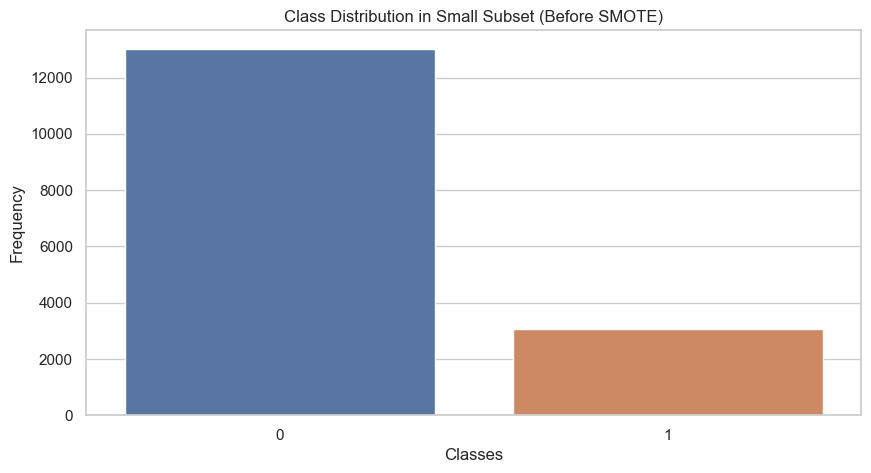

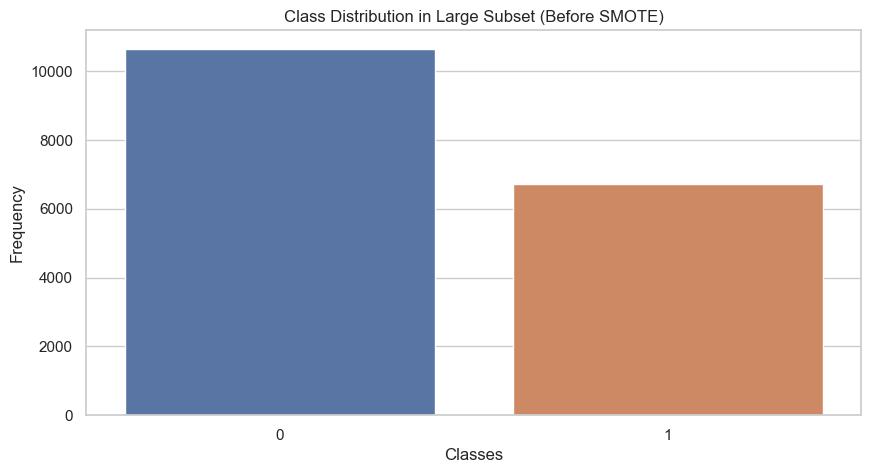

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution for small subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_s)
plt.title("Class Distribution in Small Subset (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

# Plot class distribution for large subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_l)
plt.title("Class Distribution in Large Subset (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()


In [121]:
print("Small Subset Class Distribution:")
print(y_train_s.value_counts())

print("Large Subset Class Distribution:")
print(y_train_l.value_counts())


Small Subset Class Distribution:
bug-prone
0    13029
1     3059
Name: count, dtype: int64
Large Subset Class Distribution:
bug-prone
0    10653
1     6720
Name: count, dtype: int64


In [25]:
# from imblearn.over_sampling import SMOTE

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to small subset
# X_train_resampled_s, y_train_resampled_s = smote.fit_resample(X_train_scaled_s_significant, y_train_s)

# # Apply SMOTE to large subset
# X_train_resampled_l, y_train_resampled_l = smote.fit_resample(X_train_scaled_l_significant, y_train_l)



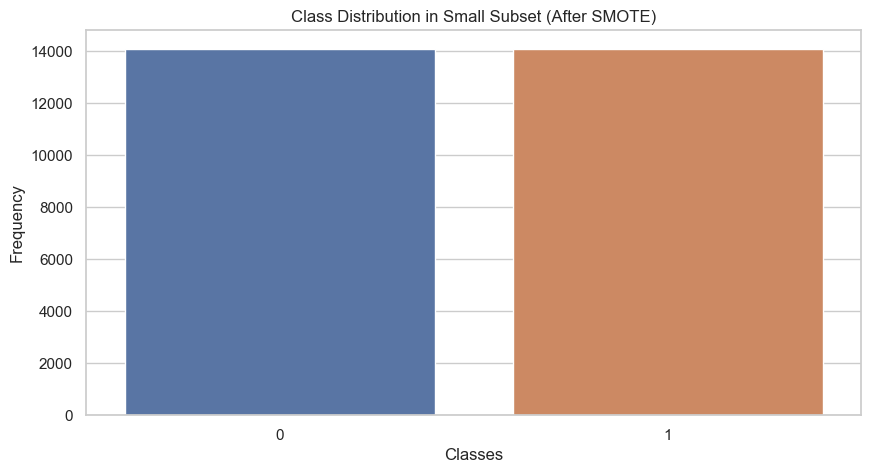

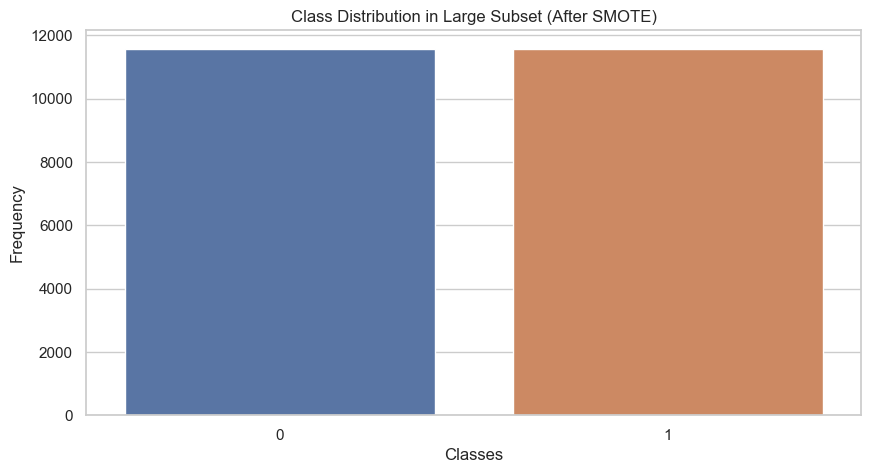

In [26]:
# # Plot class distribution for small subset after SMOTE
# plt.figure(figsize=(10, 5))
# sns.countplot(x=y_train_resampled_s)
# plt.title("Class Distribution in Small Subset (After SMOTE)")
# plt.xlabel("Classes")
# plt.ylabel("Frequency")
# plt.show()

# # Plot class distribution for large subset after SMOTE
# plt.figure(figsize=(10, 5))
# sns.countplot(x=y_train_resampled_l)
# plt.title("Class Distribution in Large Subset (After SMOTE)")
# plt.xlabel("Classes")
# plt.ylabel("Frequency")
# plt.show()


In [27]:
# print("Small Subset Class Distribution After SMOTE:")
# print(pd.Series(y_train_resampled_s).value_counts())

# print("Large Subset Class Distribution After SMOTE:")
# print(pd.Series(y_train_resampled_l).value_counts())


Small Subset Class Distribution After SMOTE:
bug-prone
0    14097
1    14097
Name: count, dtype: int64
Large Subset Class Distribution After SMOTE:
bug-prone
1    11576
0    11576
Name: count, dtype: int64


In [122]:
from imblearn.combine import SMOTEENN

# Hybrid Sampling
smoteenn = SMOTEENN(random_state=42)

X_train_resampled_s, y_train_resampled_s = smoteenn.fit_resample(X_train_scaled_s_significant, y_train_s)

X_train_resampled_l, y_train_resampled_l = smoteenn.fit_resample(X_train_scaled_l_significant, y_train_l)


In [123]:
print("Small Subset Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled_s).value_counts())

print("Large Subset Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled_l).value_counts())


Small Subset Class Distribution After SMOTE:
bug-prone
1    10194
0     9163
Name: count, dtype: int64
Large Subset Class Distribution After SMOTE:
bug-prone
1    6265
0    5089
Name: count, dtype: int64


Fine tune hyperparamers

In [128]:
# Apply the feature mask to the test set
X_test_scaled_s = X_test_scaled_s[:, significant_features_mask_s]
X_test_scaled_l = X_test_scaled_l[:, significant_features_mask_l]


In [24]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',  # Choose metric based on your objective
    cv=5,
    n_iter=50,  # Number of random combinations to try
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Best F1 score: 0.9689


In [25]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 179}
Best F1 score: 0.9439


In [26]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier_s = RandomForestClassifier(n_estimators=179, random_state=42,
                                        bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=3)
rf_classifier_l = RandomForestClassifier(n_estimators=179, random_state=42, 
                                        bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=3)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),  # Binary classification
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'  # Use the built-in scorer for AUC
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    rf_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    rf_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9697 ± 0.0162
Precision: 0.9637 ± 0.0034
Recall: 0.9794 ± 0.0320
F1: 0.9712 ± 0.0162
Mcc: 0.9400 ± 0.0322
Auc: 0.9968 ± 0.0036

Large:
Accuracy: 0.9418 ± 0.0198
Precision: 0.9421 ± 0.0107
Recall: 0.9531 ± 0.0313
F1: 0.9473 ± 0.0185
Mcc: 0.8829 ± 0.0400
Auc: 0.9873 ± 0.0067


In [29]:
# Check training score
rf_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = rf_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = rf_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
rf_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = rf_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = rf_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 1.0000, Test Score: 0.7636
Large Dataset - Training Score: 1.0000, Test Score: 0.7175


In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # For base estimator

# Define the parameter distributions for AdaBoostClassifier
param_dist = {
    'n_estimators': randint(50, 300),  # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5]  # Step size
#     'base_estimator': [DecisionTreeClassifier(max_depth=d) for d in [1, 2, 3, 5]]  # Weak learner configurations
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1', 
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 1.0, 'n_estimators': 113}
Best F1 score: 0.8720


In [31]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 1.0, 'n_estimators': 248}
Best F1 score: 0.8975


In [32]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import AdaBoostClassifier

ada_classifier_s = AdaBoostClassifier(n_estimators=113, random_state=42, learning_rate=1)
ada_classifier_l = AdaBoostClassifier(n_estimators=248, random_state=42, learning_rate=1)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),  # Binary classification
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'  # Use the built-in scorer for AUC
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    ada_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    ada_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)



Small:
Accuracy: 0.8675 ± 0.0251
Precision: 0.8583 ± 0.0066
Recall: 0.8965 ± 0.0577
F1: 0.8760 ± 0.0288
Mcc: 0.7365 ± 0.0492
Auc: 0.9532 ± 0.0184

Large:
Accuracy: 0.8898 ± 0.0320
Precision: 0.9021 ± 0.0076
Recall: 0.8977 ± 0.0623
F1: 0.8989 ± 0.0325
Mcc: 0.7801 ± 0.0630
Auc: 0.9633 ± 0.0175


In [33]:
# Check training score
ada_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = ada_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = ada_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
ada_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = ada_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = ada_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.8709, Test Score: 0.7042
Large Dataset - Training Score: 0.9095, Test Score: 0.6977


In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(10, 200),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator': [DecisionTreeClassifier(max_depth=d) for d in [1, 5, 10]]
}
# ValueError: Invalid parameter 'base_estimator' for estimator BaggingClassifier(random_state=42). 
#     Valid parameters are: ['bootstrap', 'bootstrap_features', 'estimator', 
#                         'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 
#                         'random_state', 'verbose', 'warm_start'].
        
        
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=BaggingClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': False, 'bootstrap_features': True, 'estimator': DecisionTreeClassifier(max_depth=10), 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 90}
Best F1 score: 0.9303


In [35]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': False, 'bootstrap_features': True, 'estimator': DecisionTreeClassifier(max_depth=10), 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 90}
Best F1 score: 0.9223


In [36]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import BaggingClassifier

bagging_classifier_s = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=90, random_state=42,
                                        bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples= 1.0)
bagging_classifier_l = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10), n_estimators=90, random_state=42,
                                        bootstrap=False, bootstrap_features=True, max_features=1.0, max_samples= 1.0)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    bagging_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    bagging_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9295 ± 0.0182
Precision: 0.9156 ± 0.0057
Recall: 0.9543 ± 0.0408
F1: 0.9341 ± 0.0190
Mcc: 0.8604 ± 0.0364
Auc: 0.9839 ± 0.0080

Large:
Accuracy: 0.9167 ± 0.0244
Precision: 0.9245 ± 0.0088
Recall: 0.9244 ± 0.0422
F1: 0.9240 ± 0.0237
Mcc: 0.8327 ± 0.0484
Auc: 0.9763 ± 0.0095


In [37]:
# Check training score
bagging_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = bagging_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = bagging_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
bagging_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = bagging_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = bagging_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9528, Test Score: 0.7256
Large Dataset - Training Score: 0.9653, Test Score: 0.7017


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_neighbors': randint(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
    'p': [1, 2, 3],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best F1 score: 0.9919


In [39]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'algorithm': 'kd_tree', 'metric': 'euclidean', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Best F1 score: 0.9781


In [40]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.neighbors import KNeighborsClassifier

knn_classifier_s = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='euclidean', p=1, weights='uniform')
knn_classifier_l = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='euclidean', p=1, weights='uniform')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    knn_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    knn_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9928 ± 0.0015
Precision: 0.9889 ± 0.0030
Recall: 0.9974 ± 0.0009
F1: 0.9932 ± 0.0015
Mcc: 0.9855 ± 0.0031
Auc: 0.9925 ± 0.0016

Large:
Accuracy: 0.9785 ± 0.0051
Precision: 0.9715 ± 0.0065
Recall: 0.9901 ± 0.0046
F1: 0.9807 ± 0.0046
Mcc: 0.9567 ± 0.0104
Auc: 0.9772 ± 0.0054


In [41]:
# Check training score
knn_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = knn_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = knn_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
knn_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = knn_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = knn_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 1.0000, Test Score: 0.7325
Large Dataset - Training Score: 1.0000, Test Score: 0.6756


In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'var_smoothing': [1e-12, 1e-9, 1e-6, 1e-3, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=param_dist,
    scoring='f1',  # Choose your evaluation metric
    cv=5,
    n_iter=5,  # Number of random combinations
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'var_smoothing': 0.001}
Best F1 score: 0.7498


In [44]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'var_smoothing': 1e-12}
Best F1 score: 0.8127


In [45]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.naive_bayes import GaussianNB

nb_classifier_s = GaussianNB(var_smoothing=0.001)
nb_classifier_l = GaussianNB(var_smoothing=1e-12)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    nb_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    nb_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.7528 ± 0.0099
Precision: 0.8016 ± 0.0091
Recall: 0.7049 ± 0.0131
F1: 0.7501 ± 0.0108
Mcc: 0.5116 ± 0.0194
Auc: 0.8499 ± 0.0069

Large:
Accuracy: 0.8037 ± 0.0182
Precision: 0.8562 ± 0.0133
Recall: 0.7743 ± 0.0306
F1: 0.8129 ± 0.0196
Mcc: 0.6113 ± 0.0342
Auc: 0.8988 ± 0.0137


In [46]:
# Check training score
nb_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = nb_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = nb_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
nb_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = nb_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = nb_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.7526, Test Score: 0.6746
Large Dataset - Training Score: 0.8045, Test Score: 0.6632


In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['sqrt', 'log2', None],
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 0.1956637125175451, 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 165, 'subsample': 0.7177795568278342}
Best F1 score: 0.9690


In [48]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': 0.1854746143855911, 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 12, 'n_estimators': 295, 'subsample': 0.743796460487902}
Best F1 score: 0.9449


In [49]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier_s = GradientBoostingClassifier(loss='exponential', n_estimators=165, random_state=42, 
                                             learning_rate=0.1956637125175451, max_depth=19, max_features='log2', 
                                             min_samples_leaf=3, min_samples_split=2, subsample=0.7177795568278342)
gb_classifier_l = GradientBoostingClassifier(loss='exponential', n_estimators=295, random_state=42,
                                            learning_rate=0.1854746143855911, max_depth=19, max_features='sqrt', 
                                             min_samples_leaf=9, min_samples_split=12, subsample=0.743796460487902)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    gb_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    gb_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9711 ± 0.0136
Precision: 0.9639 ± 0.0037
Recall: 0.9820 ± 0.0279
F1: 0.9726 ± 0.0135
Mcc: 0.9427 ± 0.0270
Auc: 0.9964 ± 0.0030

Large:
Accuracy: 0.9449 ± 0.0198
Precision: 0.9459 ± 0.0064
Recall: 0.9547 ± 0.0353
F1: 0.9500 ± 0.0188
Mcc: 0.8894 ± 0.0400
Auc: 0.9887 ± 0.0070


In [50]:
# Check training score
gb_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = gb_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = gb_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
gb_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = gb_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = gb_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 1.0000, Test Score: 0.7634
Large Dataset - Training Score: 1.0000, Test Score: 0.7192


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': randint(2, 50),
    'min_impurity_decrease': uniform(0.0, 0.1),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',  
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 25, 'max_features': None, 'max_leaf_nodes': 26, 'min_impurity_decrease': 0.0005061583846218687, 'min_samples_leaf': 14, 'min_samples_split': 19, 'splitter': 'random'}
Best F1 score: 0.8521


In [52]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 25, 'max_features': None, 'max_leaf_nodes': 26, 'min_impurity_decrease': 0.0005061583846218687, 'min_samples_leaf': 14, 'min_samples_split': 19, 'splitter': 'random'}
Best F1 score: 0.8611


In [53]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.tree import DecisionTreeClassifier

dt_classifier_s = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=None, max_leaf_nodes=26, 
                                         min_impurity_decrease=0.0005061583846218687, min_samples_leaf=14, 
                                         min_samples_split=19, splitter='random')
dt_classifier_l = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=None, max_leaf_nodes=26, 
                                         min_impurity_decrease=0.0005061583846218687, min_samples_leaf=14, 
                                         min_samples_split=19, splitter='random')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    dt_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    dt_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8377 ± 0.0088
Precision: 0.8040 ± 0.0192
Recall: 0.9167 ± 0.0305
F1: 0.8560 ± 0.0081
Mcc: 0.6813 ± 0.0169
Auc: 0.9148 ± 0.0058

Large:
Accuracy: 0.8468 ± 0.0133
Precision: 0.8729 ± 0.0276
Recall: 0.8482 ± 0.0455
F1: 0.8590 ± 0.0154
Mcc: 0.6943 ± 0.0259
Auc: 0.9379 ± 0.0076


In [54]:
# Check training score
dt_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = dt_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = dt_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
dt_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = dt_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = dt_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.8480, Test Score: 0.6644
Large Dataset - Training Score: 0.8549, Test Score: 0.6959


In [55]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': randint(5, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_leaf_nodes': randint(10, 100),
    'min_impurity_decrease': uniform(0.0, 0.1),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ExtraTreesClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',  # Choose your evaluation metric
    cv=5,
    n_iter=50,  # Number of random combinations
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 16, 'max_features': None, 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.0027616771873704704, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 81}
Best F1 score: 0.8642


In [56]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 16, 'max_features': None, 'max_leaf_nodes': 96, 'min_impurity_decrease': 0.0027616771873704704, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 81}
Best F1 score: 0.8588


In [57]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import ExtraTreesClassifier

et_classifier_s = ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_depth=16, max_features=None, 
                                       max_leaf_nodes=96, min_impurity_decrease=0.0027616771873704704, min_samples_leaf=2, 
                                       min_samples_split=3, n_estimators=81)
et_classifier_l = ExtraTreesClassifier(bootstrap=False, criterion='entropy', max_depth=16, max_features=None, 
                                       max_leaf_nodes=96, min_impurity_decrease=0.0027616771873704704, min_samples_leaf=2, 
                                       min_samples_split=3, n_estimators=81)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    et_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    et_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8425 ± 0.0073
Precision: 0.8001 ± 0.0064
Recall: 0.9344 ± 0.0095
F1: 0.8620 ± 0.0065
Mcc: 0.6923 ± 0.0151
Auc: 0.9200 ± 0.0067

Large:
Accuracy: 0.8510 ± 0.0096
Precision: 0.8995 ± 0.0079
Recall: 0.8219 ± 0.0170
F1: 0.8588 ± 0.0101
Mcc: 0.7051 ± 0.0180
Auc: 0.9436 ± 0.0059


In [58]:
# Check training score
et_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = et_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = et_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
et_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = et_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = et_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.8434, Test Score: 0.6378
Large Dataset - Training Score: 0.8511, Test Score: 0.6945


In [59]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_iter': randint(50, 500),
    'max_leaf_nodes': randint(10, 100),
    'max_depth': [None] + list(range(3, 51)),
    'min_samples_leaf': randint(1, 20),
    'l2_regularization': uniform(0.0, 1.0),
    'max_bins': randint(50, 255),
    'early_stopping': [True, False],
    'scoring': ['loss', 'accuracy', 'f1', 'roc_auc'],
    'loss': ['log_loss']
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'early_stopping': True, 'l2_regularization': 0.3109823217156622, 'learning_rate': 0.1075549966080241, 'loss': 'log_loss', 'max_bins': 148, 'max_depth': 45, 'max_iter': 409, 'max_leaf_nodes': 95, 'min_samples_leaf': 3, 'scoring': 'loss'}
Best F1 score: 0.9492


In [60]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'early_stopping': False, 'l2_regularization': 0.5309345833171364, 'learning_rate': 0.1443349493719275, 'loss': 'log_loss', 'max_bins': 247, 'max_depth': 33, 'max_iter': 296, 'max_leaf_nodes': 77, 'min_samples_leaf': 11, 'scoring': 'roc_auc'}
Best F1 score: 0.9402


In [61]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_classifier_s = HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.3109823217156622, 
                                                  learning_rate=0.1075549966080241, loss='log_loss', max_bins=148, 
                                                  max_depth=45, max_iter=409, max_leaf_nodes=95, min_samples_leaf=3, 
                                                  scoring='loss')
hgb_classifier_l = HistGradientBoostingClassifier(early_stopping=False, l2_regularization=0.5309345833171364, 
                                                  learning_rate=0.1443349493719275, loss='log_loss', max_bins=247, 
                                                  max_depth=33, max_iter=296, max_leaf_nodes=77, min_samples_leaf=11, 
                                                  scoring='roc_auc')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    hgb_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    hgb_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9625 ± 0.0307
Precision: 0.9656 ± 0.0045
Recall: 0.9633 ± 0.0634
F1: 0.9633 ± 0.0320
Mcc: 0.9272 ± 0.0577
Auc: 0.9950 ± 0.0060

Large:
Accuracy: 0.9391 ± 0.0274
Precision: 0.9450 ± 0.0079
Recall: 0.9445 ± 0.0487
F1: 0.9442 ± 0.0262
Mcc: 0.8784 ± 0.0546
Auc: 0.9866 ± 0.0096


In [62]:
# Check training score
hgb_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = hgb_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = hgb_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
hgb_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = hgb_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = hgb_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9965, Test Score: 0.7731
Large Dataset - Training Score: 1.0000, Test Score: 0.7196


In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (50, 100, 50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': uniform(0.01, 0.1),  
    'max_iter': randint(200, 1000), 
    'batch_size': [32, 64, 128, 'auto']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=MLPClassifier(),
    param_distributions=param_dist,
    scoring='f1',
    cv=5,
    n_iter=50,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.0006808361216819947, 'batch_size': 'auto', 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.012058449429580245, 'max_iter': 969, 'solver': 'sgd'}
Best F1 score: 0.9714


In [64]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.006676128923003434, 'batch_size': 32, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.046771580305943354, 'max_iter': 574, 'solver': 'sgd'}
Best F1 score: 0.9459


In [65]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.neural_network import MLPClassifier

mlp_classifier_s = MLPClassifier(activation='tanh', alpha=0.0006808361216819947, batch_size='auto', 
                                 hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive', 
                                 learning_rate_init=0.012058449429580245, max_iter=969, random_state=42, solver='sgd')
mlp_classifier_l = MLPClassifier(activation='tanh', alpha=0.006676128923003434, batch_size=32, 
                                 hidden_layer_sizes=(100, 50), learning_rate='adaptive', 
                                 learning_rate_init=0.046771580305943354, max_iter=574, random_state=42, solver='sgd')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    mlp_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    mlp_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9713 ± 0.0045
Precision: 0.9638 ± 0.0058
Recall: 0.9824 ± 0.0059
F1: 0.9730 ± 0.0042
Mcc: 0.9426 ± 0.0090
Auc: 0.9882 ± 0.0032

Large:
Accuracy: 0.9441 ± 0.0066
Precision: 0.9368 ± 0.0082
Recall: 0.9638 ± 0.0106
F1: 0.9500 ± 0.0060
Mcc: 0.8872 ± 0.0134
Auc: 0.9821 ± 0.0030


In [66]:
# Check training score
mlp_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = mlp_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = mlp_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
mlp_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = mlp_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = mlp_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9971, Test Score: 0.7492
Large Dataset - Training Score: 1.0000, Test Score: 0.6915


In [69]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution
# param_dist = {
#     'radius': uniform(0.1, 10.0),  # Range of radius values to test
#     'weights': ['uniform', 'distance'],  # How weights are assigned
#     'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],  # Distance metrics
#     'p': [1, 2, 3],  # Power parameter for Minkowski metric
#     'outlier_label': [None],  # How to handle outliers
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used for nearest neighbors
# }
param_dist = {
    'radius': uniform(1.0, 20.0),  # Range of radius values to test
    'weights': ['uniform', 'distance'],  # How weights are assigned
    'metric': ['euclidean', 'manhattan'],  # Distance metrics
    'p': [1, 2],  # Power parameter for Minkowski metric
    'outlier_label': [0, 1],  # Handle outliers with a default label
    'algorithm': ['auto', 'ball_tree']  # Algorithm used for nearest neighbors
}
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RadiusNeighborsClassifier(),
    param_distributions=param_dist,
    scoring='f1',  # Use 'f1' for classification
    cv=5,  # 5-fold cross-validation
    n_iter=50,  # Number of parameter settings sampled
    verbose=2,
    n_jobs=1,  # Run single-threaded
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.8s
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.7s
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.7s
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.8s
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.7s
[CV] END algorithm=auto, metric=euclidean, outlier_label=1, p=1, radius=2.9994983163600577, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, metric=euclidean, outlier_label=1, p=1, radius=2.9994983163600577, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, metric=euclidean,

In [70]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, metric=manhattan, outlier_label=0, p=1, radius=15.639878836228101, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, metric=euclidean, outlier_label=1, p=1, radius=2.9994983163600577, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean, outlier_label=1, p=1, radius=2.9994983163600577, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, metric=euclidean,

In [71]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.neighbors import RadiusNeighborsClassifier


neigh_classifier_s = RadiusNeighborsClassifier(algorithm='ball_tree', metric='euclidean', outlier_label=0, p=1, 
                                               radius=1.139042610623814, weights='distance')
neigh_classifier_l = RadiusNeighborsClassifier(algorithm='ball_tree', metric='manhattan', outlier_label=1, p=2, 
                                               radius=11.71549368149517, weights='distance')
# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    neigh_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    neigh_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9553 ± 0.0076
Precision: 0.9821 ± 0.0033
Recall: 0.9321 ± 0.0153
F1: 0.9564 ± 0.0078
Mcc: 0.9121 ± 0.0144
Auc: 0.9719 ± 0.0053

Large:
Accuracy: 0.9143 ± 0.0071
Precision: 0.9040 ± 0.0087
Recall: 0.9453 ± 0.0111
F1: 0.9241 ± 0.0064
Mcc: 0.8271 ± 0.0145
Auc: 0.9523 ± 0.0059


In [72]:
# Check training score
neigh_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = neigh_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = neigh_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
neigh_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = neigh_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = neigh_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 1.0000, Test Score: 0.7825
Large Dataset - Training Score: 1.0000, Test Score: 0.6717


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


param_dist = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': uniform(0.01, 10), 
     'max_iter': [100, 500, 1000, 1500, 2000, 2500, 3000, 3500], 'class_weight': ['balanced', None]},
    {'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'], 'C': uniform(0.01, 10), 
     'max_iter': [100, 500, 1000, 1500, 2000, 2500, 3000, 3500], 'class_weight': ['balanced', None]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': uniform(0.01, 10), 'l1_ratio': uniform(0, 1), 
     'max_iter': [100, 500, 1000, 1500, 2000, 2500, 3000, 3500], 'class_weight': ['balanced', None]},
]
# Initialize the model
log_reg = LogisticRegression(random_state=42, verbose=1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    scoring='f1',  # Use F1 score for binary classification
    cv=5,  # 5-fold cross-validation
    n_iter=50,  # Number of random parameter combinations to try
    n_jobs=-1,  # Use all available processors
    random_state=42
)

# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

[LibLinear]Small : Best parameters: {'C': 6.353513447013638, 'class_weight': None, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 score: 0.8492
convergence after 1294 epochs took 12 seconds
Large : Best parameters: {'C': 3.242029320207552, 'class_weight': None, 'l1_ratio': 0.5581020020173412, 'max_iter': 1500, 'penalty': 'elasticnet', 'solver': 'saga'}
Best F1 score: 0.8545


In [80]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.linear_model import LogisticRegression

log_reg_classifier_s = LogisticRegression(C=6.353513447013638, class_weight=None, 
                                          max_iter=500, penalty='l1', solver='liblinear')
log_reg_classifier_l = LogisticRegression(C=3.242029320207552, class_weight=None, l1_ratio = 0.5581020020173412,
                                          max_iter=1500, penalty='elasticnet', solver='saga')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    log_reg_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    log_reg_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8334 ± 0.0069
Precision: 0.8136 ± 0.0083
Recall: 0.8871 ± 0.0063
F1: 0.8487 ± 0.0059
Mcc: 0.6674 ± 0.0137
Auc: 0.9109 ± 0.0054

Large:
Accuracy: 0.8407 ± 0.0109
Precision: 0.8635 ± 0.0065
Recall: 0.8448 ± 0.0229
F1: 0.8539 ± 0.0119
Mcc: 0.6793 ± 0.0207
Auc: 0.9357 ± 0.0079


In [81]:
# Check training score
log_reg_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = log_reg_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = log_reg_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
log_reg_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = log_reg_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = log_reg_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.8340, Test Score: 0.6503
Large Dataset - Training Score: 0.8440, Test Score: 0.6768


In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'C': uniform(1, 10),                   # Regularization strength
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],             # Kernel coefficient
    'degree': randint(2, 6)                 # Degree for 'poly' kernel
}

svc = SVC(random_state=42, probability=True)  # `probability=True` for predicted probabilities

random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=20,           # Number of random parameter combinations
    scoring='f1',        # Optimize F1 score
    cv=5,                # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,           # Use all available processors
    random_state=42
)


# Fit the model
random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Small : Best parameters: {'C': 8.851759613930136, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1 score: 0.9173


In [84]:
# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Large : Best parameters: {'C': 8.851759613930136, 'degree': 4, 'gamma': 'auto', 'kernel': 'rbf'}
Best F1 score: 0.9286


In [85]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.svm import SVC

svm_classifier_s = SVC(random_state=42, probability=True, C=8.851759613930136, degree=4, gamma='auto', kernel='rbf')
svm_classifier_l = SVC(random_state=42, probability=True, C=8.851759613930136, degree=4, gamma='auto', kernel='rbf')

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    svm_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    svm_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9104 ± 0.0061
Precision: 0.8881 ± 0.0062
Recall: 0.9495 ± 0.0077
F1: 0.9177 ± 0.0057
Mcc: 0.8218 ± 0.0124
Auc: 0.9651 ± 0.0027

Large:
Accuracy: 0.9242 ± 0.0068
Precision: 0.9240 ± 0.0096
Recall: 0.9400 ± 0.0107
F1: 0.9319 ± 0.0061
Mcc: 0.8467 ± 0.0138
Auc: 0.9758 ± 0.0045


In [86]:
# Check training score
svm_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = svm_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = svm_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
svm_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = svm_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = svm_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9209, Test Score: 0.7042
Large Dataset - Training Score: 0.9591, Test Score: 0.6950


In [87]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


param_distributions = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],  # Loss functions
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization types
    'alpha': uniform(1e-5, 1e-2),  # Regularization strength
    'l1_ratio': uniform(0, 1),  # ElasticNet mixing parameter (only relevant if penalty='elasticnet')
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedule
    'eta0': uniform(1e-4, 1e-1),  # Initial learning rate for 'constant' or 'invscaling'
    'max_iter': randint(100, 1000),  # Maximum iterations
    'tol': uniform(1e-5, 1e-2),  # Stopping tolerance
    'class_weight': [None, 'balanced']  # Handling class imbalance
}

sgd_clf = SGDClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=sgd_clf,
    param_distributions=param_distributions,
    scoring='f1',  # Use F1 score for binary classification
    n_iter=50,  # Number of random parameter combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available processors
    random_state=42
)

random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Small : Best parameters: {'alpha': 0.0007156874740042985, 'class_weight': None, 'eta0': 0.09452515971251675, 'l1_ratio': 0.8671989335550038, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'max_iter': 951, 'penalty': 'l2', 'tol': 0.005743670416719333}
Best F1 score: 0.8423
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Large : Best parameters: {'alpha': 0.001662669390630025, 'class_weight': None, 'eta0': 0.09878869366005173, 'l1_ratio': 0.7722447692966574, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'max_iter': 598, 'penalty': 'l1', 'tol': 0.0071234195274864996}
Best F1 score: 0.8580


In [88]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from sklearn.linear_model import SGDClassifier

sgd_classifier_s = SGDClassifier(alpha=0.0007156874740042985, class_weight=None, eta0=0.09452515971251675, 
                                 l1_ratio=0.8671989335550038, learning_rate='adaptive', loss='modified_huber', max_iter=951, 
                                 penalty='l2', tol=0.005743670416719333)
sgd_classifier_l = SGDClassifier(alpha=0.001662669390630025, class_weight=None, eta0=0.09878869366005173, 
                                 l1_ratio=0.7722447692966574, learning_rate='adaptive', loss='modified_huber', max_iter=598, 
                                 penalty='l1', tol=0.0071234195274864996)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    sgd_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    sgd_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.8247 ± 0.0086
Precision: 0.8030 ± 0.0098
Recall: 0.8841 ± 0.0085
F1: 0.8416 ± 0.0073
Mcc: 0.6502 ± 0.0170
Auc: 0.9089 ± 0.0053

Large:
Accuracy: 0.8450 ± 0.0132
Precision: 0.8647 ± 0.0079
Recall: 0.8525 ± 0.0253
F1: 0.8584 ± 0.0139
Mcc: 0.6876 ± 0.0254
Auc: 0.9356 ± 0.0081


In [89]:
# Check training score
sgd_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = sgd_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = sgd_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
sgd_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = sgd_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = sgd_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.8266, Test Score: 0.6458
Large Dataset - Training Score: 0.8461, Test Score: 0.6727


In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Define the parameter distribution
param_distributions = {
    'n_estimators': randint(50, 500),          # Number of boosting rounds
    'max_depth': randint(3, 10),              # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.3),      # Step size shrinkage
    'subsample': uniform(0.5, 0.5),           # Fraction of samples used for training
    'colsample_bytree': uniform(0.5, 0.5),    # Fraction of features used for training
    'min_child_weight': randint(1, 10),       # Minimum child weight
    'gamma': uniform(0, 5),                   # Minimum loss reduction for split
    'reg_alpha': uniform(0, 1),               # L1 regularization
    'reg_lambda': uniform(0, 1),              # L2 regularization
}

# Initialize the model
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_distributions,
    scoring='f1',                # Optimize for F1 score
    n_iter=50,                   # Number of random combinations to try
    cv=5,                        # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,                   # Use all available processors
    random_state=42
)


random_search.fit(X_train_resampled_s, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")

# Fit the model
random_search.fit(X_train_resampled_l, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Small : Best parameters: {'colsample_bytree': 0.5971369767560211, 'gamma': 0.3547045849996383, 'learning_rate': 0.1290351481641665, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 192, 'reg_alpha': 0.375582952639944, 'reg_lambda': 0.093981939840869, 'subsample': 0.789140070498087}
Best F1 score: 0.9327
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Large : Best parameters: {'colsample_bytree': 0.5971369767560211, 'gamma': 0.3547045849996383, 'learning_rate': 0.1290351481641665, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 192, 'reg_alpha': 0.375582952639944, 'reg_lambda': 0.093981939840869, 'subsample': 0.789140070498087}
Best F1 score: 0.9308


In [91]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from xgboost import XGBClassifier

xgb_classifier_s = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree=0.5971369767560211, 
                                 gamma=0.3547045849996383, learning_rate=0.1290351481641665, max_depth=8, 
                                 min_child_weight=3, n_estimators=192, reg_alpha=0.375582952639944, 
                                 reg_lambda=0.093981939840869, subsample=0.789140070498087)
xgb_classifier_l = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree=0.5971369767560211, 
                                 gamma=0.3547045849996383, learning_rate=0.1290351481641665, max_depth=8, 
                                 min_child_weight=3, n_estimators=192, reg_alpha=0.375582952639944, 
                                 reg_lambda=0.093981939840869, subsample=0.789140070498087)

# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    xgb_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    xgb_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)




Small:
Accuracy: 0.9520 ± 0.0414
Precision: 0.9595 ± 0.0050
Recall: 0.9492 ± 0.0850
F1: 0.9521 ± 0.0447
Mcc: 0.9078 ± 0.0759
Auc: 0.9924 ± 0.0097

Large:
Accuracy: 0.9300 ± 0.0302
Precision: 0.9373 ± 0.0064
Recall: 0.9357 ± 0.0570
F1: 0.9357 ± 0.0293
Mcc: 0.8608 ± 0.0601
Auc: 0.9841 ± 0.0114


In [92]:
# Check training score
xgb_classifier_s.fit(X_train_resampled_s, y_train_resampled_s)
train_score_s = xgb_classifier_s.score(X_train_resampled_s, y_train_resampled_s)
test_score_s = xgb_classifier_s.score(X_test_scaled_s, y_test_s)

print(f"Small Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")


# Check training score
xgb_classifier_l.fit(X_train_resampled_l, y_train_resampled_l)
train_score_s = xgb_classifier_l.score(X_train_resampled_l, y_train_resampled_l)
test_score_s = xgb_classifier_l.score(X_test_scaled_l, y_test_l)

print(f"Large Dataset - Training Score: {train_score_s:.4f}, Test Score: {test_score_s:.4f}")



Small Dataset - Training Score: 0.9888, Test Score: 0.7763
Large Dataset - Training Score: 0.9989, Test Score: 0.7228


In [93]:
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D, Reshape
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define the model creation function
def create_cnn_model(optimizer='adam', dropout_rate=0.3, filters=64, kernel_size=2, dense_units=64):
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),  # Reshape to 1D
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=filters // 2, kernel_size=kernel_size, activation='relu'),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model
cnn_model_wrapper = KerasClassifier(
    model=create_cnn_model, 
    verbose=0,
    optimizer="adam",  # Default values
    dropout_rate=0.3,
    filters=64,
    kernel_size=2,
    dense_units=64,
    epochs=50,
    batch_size=32
)

# Define hyperparameter search space
param_distributions = {
    'optimizer': ['adam', 'sgd'],
    'dropout_rate': uniform(0.1, 0.4),       # Range: 0.1 to 0.5
    'filters': randint(32, 128),            # Range: 32 to 128 filters
    'kernel_size': randint(2, 5),           # Kernel sizes of 2, 3, or 4
    'dense_units': randint(32, 128),        # Dense layer size
    'epochs': randint(10, 100),             # Training epochs
    'batch_size': randint(16, 128),         # Batch sizes
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cnn_model_wrapper,
    param_distributions=param_distributions,
    n_iter=50,                # Number of parameter settings sampled
    scoring='accuracy',       # Metric to optimize
    cv=3,                     # Cross-validation splits
    verbose=2,
    n_jobs=2                 
)

X_train=X_train_resampled_s
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train_resampled_s)

# Print the best parameters and score
print(f"Small : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")



Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\LENOVO\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Small : Best parameters: {'batch_size': 51, 'dense_units': 65, 'dropout_rate': 0.2694515478807965, 'epochs': 67, 'filters': 86, 'kernel_size': 3, 'optimizer': 'adam'}
Best F1 score: 0.9507


In [94]:
X_train=X_train_resampled_l
# Fit the model
random_search.fit(X_train, y_train_resampled_l)

# Print the best parameters and score
print(f"Large : Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_:.4f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\LENOVO\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Large : Best parameters: {'batch_size': 97, 'dense_units': 93, 'dropout_rate': 0.27766753651814313, 'epochs': 79, 'filters': 87, 'kernel_size': 3, 'optimizer': 'adam'}
Best F1 score: 0.9332


In [95]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, precision_score, recall_score, f1_score, 
    matthews_corrcoef, roc_auc_score
)
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D, Reshape
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Define the CNN model for the small dataset using the best parameters
model_s = Sequential([
    Reshape((X_train_resampled_s.shape[1], 1), input_shape=(X_train_resampled_s.shape[1],)),
    Conv1D(filters=86, kernel_size=3, activation='relu'),  # Use the best 'filters' and 'kernel_size'
    MaxPooling1D(pool_size=3),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(units=65, activation='relu'),  # Use the best 'dense_units'
    Dropout(rate=0.27),  # Use the best 'dropout_rate'
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model using the best optimizer
model_s.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Wrap the model
cnn_classifier_s = KerasClassifier(model=model_s, batch_size=51, epochs=67, verbose=1)


#  {'batch_size': 97, 'dense_units': 93, 'dropout_rate': 0.27766753651814313, 'epochs': 79, 'filters': 87, 'kernel_size': 3, 'optimizer': 'adam'}

# Define the CNN model for the large dataset using the best parameters
model_l = Sequential([
    Reshape((X_train_resampled_l.shape[1], 1), input_shape=(X_train_resampled_l.shape[1],)),
    Conv1D(filters=87, kernel_size=3, activation='relu'),  # Use the best 'filters' and 'kernel_size'
    MaxPooling1D(pool_size=3),
    Conv1D(filters=32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(units=93, activation='relu'),  # Use the best 'dense_units'
    Dropout(rate=0.28),  # Use the best 'dropout_rate'
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model using the best optimizer
model_l.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Wrap the model
cnn_classifier_l = KerasClassifier(model=model_l, batch_size=97, epochs=79, verbose=1)



# Define custom scorers for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary'),
    'mcc': make_scorer(matthews_corrcoef),
    'auc': 'roc_auc'
}

# Perform cross-validation on the small dataset
cv_results_s = cross_validate(
    cnn_classifier_s, X_train_resampled_s, y_train_resampled_s, 
    cv=10, scoring=scoring, return_train_score=False
)

# Perform cross-validation on the large dataset
cv_results_l = cross_validate(
    cnn_classifier_l, X_train_resampled_l, y_train_resampled_l, 
    cv=10, scoring=scoring, return_train_score=False
)

# Helper function to display results
def print_cv_results(name, results):
    print(f"\n{name}:")
    for metric in scoring.keys():
        mean = results[f'test_{metric}'].mean()
        std = results[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

# Print metrics for small and large datasets
print_cv_results("Small", cv_results_s)
print_cv_results("Large", cv_results_l)



c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/67


c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7615 - loss: 0.5137
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8097 - loss: 0.4228
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8255 - loss: 0.3912
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8330 - loss: 0.3732
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8466 - loss: 0.3552
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8498 - loss: 0.3461
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8524 - loss: 0.3368
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8578 - loss: 0.3325
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8680 - loss: 0.3135
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8634 - loss: 0.3228
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8691 - loss: 0.3051
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7643 - loss: 0.5099
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8194 - loss: 0.4115
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8235 - loss: 0.3929
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8434 - loss: 0.3571
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8500 - loss: 0.3557
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8510 - loss: 0.3414
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8585 - loss: 0.3282
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8602 - loss: 0.3276
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8634 - loss: 0.3187
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8720 - loss: 0.3132
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8771 - loss: 0.3008
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7705 - loss: 0.5012
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8149 - loss: 0.4085
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8293 - loss: 0.3842
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8374 - loss: 0.3732
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8433 - loss: 0.3510
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8543 - loss: 0.3405
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8535 - loss: 0.3399
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8616 - loss: 0.3322
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8623 - loss: 0.3251
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8698 - loss: 0.3153
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8745 - loss: 0.3047
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7672 - loss: 0.5075
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8219 - loss: 0.4106
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8292 - loss: 0.3868
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8377 - loss: 0.3653
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8445 - loss: 0.3541
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8477 - loss: 0.3479
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8526 - loss: 0.3383
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8581 - loss: 0.3316
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8653 - loss: 0.3139
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8682 - loss: 0.3121
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8725 - loss: 0.3015
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7712 - loss: 0.5023
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8187 - loss: 0.4101
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8253 - loss: 0.3919
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8399 - loss: 0.3640
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8438 - loss: 0.3608
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8533 - loss: 0.3414
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8615 - loss: 0.3316
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8655 - loss: 0.3232
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8660 - loss: 0.3143
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8662 - loss: 0.3126
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8749 - loss: 0.3064
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7694 - loss: 0.5062
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8179 - loss: 0.4054
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8286 - loss: 0.3836
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8375 - loss: 0.3670
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8489 - loss: 0.3515
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8553 - loss: 0.3440
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8580 - loss: 0.3342
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8626 - loss: 0.3256
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8623 - loss: 0.3228
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8696 - loss: 0.3131
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8707 - loss: 0.3043
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7607 - loss: 0.5110
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8177 - loss: 0.4122
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8317 - loss: 0.3836
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8417 - loss: 0.3630
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8451 - loss: 0.3515
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8556 - loss: 0.3377
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8571 - loss: 0.3349
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8672 - loss: 0.3194
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8689 - loss: 0.3171
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8702 - loss: 0.3117
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8766 - loss: 0.2975
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7725 - loss: 0.5045
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8177 - loss: 0.4085
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8311 - loss: 0.3769
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8395 - loss: 0.3616
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8416 - loss: 0.3569
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8528 - loss: 0.3363
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8589 - loss: 0.3290
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8624 - loss: 0.3185
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8685 - loss: 0.3039
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8770 - loss: 0.2977
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8769 - loss: 0.2957
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7733 - loss: 0.5025
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8218 - loss: 0.4107
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8259 - loss: 0.3876
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8347 - loss: 0.3685
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8460 - loss: 0.3557
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8485 - loss: 0.3488
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8578 - loss: 0.3370
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8574 - loss: 0.3299
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8681 - loss: 0.3199
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8719 - loss: 0.3092
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8703 - loss: 0.3050
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


342/342 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7689 - loss: 0.5064
Epoch 2/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8179 - loss: 0.4116
Epoch 3/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8234 - loss: 0.3858
Epoch 4/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8401 - loss: 0.3655
Epoch 5/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8454 - loss: 0.3536
Epoch 6/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8498 - loss: 0.3462
Epoch 7/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8557 - loss: 0.3326
Epoch 8/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8613 - loss: 0.3297
Epoch 9/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8678 - loss: 0.3114
Epoch 10/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8656 - loss: 0.3129
Epoch 11/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8728 - loss: 0.3039
Epoch 12/67
342/342 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7611 - loss: 0.4766
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8398 - loss: 0.3262
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8455 - loss: 0.3171
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8540 - loss: 0.3024
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8618 - loss: 0.2871
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8644 - loss: 0.2814
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8724 - loss: 0.2653
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8792 - loss: 0.2581
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8846 - loss: 0.2460
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8795 - loss: 0.2552
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8900 - loss: 0.2421
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7655 - loss: 0.4787
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8353 - loss: 0.3411
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8434 - loss: 0.3189
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8597 - loss: 0.2960
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8643 - loss: 0.2901
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8601 - loss: 0.2866
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8674 - loss: 0.2807
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8709 - loss: 0.2727
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8730 - loss: 0.2665
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8805 - loss: 0.2593
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8771 - loss: 0.2621
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accur

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7517 - loss: 0.4853
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8338 - loss: 0.3436
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8502 - loss: 0.3182
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8548 - loss: 0.3013
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8600 - loss: 0.2986
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8634 - loss: 0.2871
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8708 - loss: 0.2723
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8717 - loss: 0.2719
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8762 - loss: 0.2640
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8779 - loss: 0.2595
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8831 - loss: 0.2483
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accura

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7682 - loss: 0.4748
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8381 - loss: 0.3294
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8450 - loss: 0.3169
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8550 - loss: 0.2978
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8670 - loss: 0.2848
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8556 - loss: 0.2927
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8728 - loss: 0.2739
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8686 - loss: 0.2771
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8706 - loss: 0.2667
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8874 - loss: 0.2513
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8873 - loss: 0.2524
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accura

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7679 - loss: 0.4823
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8466 - loss: 0.3285
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8500 - loss: 0.3114
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8459 - loss: 0.3063
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8658 - loss: 0.2883
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8691 - loss: 0.2766
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8689 - loss: 0.2809
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8733 - loss: 0.2693
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8749 - loss: 0.2643
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8831 - loss: 0.2537
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8876 - loss: 0.2427
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accura

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7666 - loss: 0.4762
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8382 - loss: 0.3421
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8480 - loss: 0.3129
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8557 - loss: 0.3006
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8552 - loss: 0.2922
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8692 - loss: 0.2771
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8747 - loss: 0.2748
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8773 - loss: 0.2658
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8779 - loss: 0.2594
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8752 - loss: 0.2589
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8869 - loss: 0.2525
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7756 - loss: 0.4688
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8372 - loss: 0.3378
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8488 - loss: 0.3151
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8504 - loss: 0.3078
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8649 - loss: 0.2828
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8712 - loss: 0.2781
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8684 - loss: 0.2761
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8602 - loss: 0.2769
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8749 - loss: 0.2707
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8788 - loss: 0.2550
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8860 - loss: 0.2558
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accura

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7663 - loss: 0.4761
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8403 - loss: 0.3354
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8493 - loss: 0.3173
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8513 - loss: 0.3034
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8628 - loss: 0.2900
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8694 - loss: 0.2842
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8676 - loss: 0.2818
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8775 - loss: 0.2673
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8719 - loss: 0.2718
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8824 - loss: 0.2559
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8813 - loss: 0.2573
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accura

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7776 - loss: 0.4709
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8385 - loss: 0.3308
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8462 - loss: 0.3165
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8524 - loss: 0.3017
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8594 - loss: 0.2989
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8689 - loss: 0.2749
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8684 - loss: 0.2735
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8749 - loss: 0.2724
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8810 - loss: 0.2519
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8792 - loss: 0.2594
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8847 - loss: 0.2494
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accurac

c:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 18 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


106/106 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7724 - loss: 0.4727
Epoch 2/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8374 - loss: 0.3378
Epoch 3/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8426 - loss: 0.3172
Epoch 4/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8551 - loss: 0.3073
Epoch 5/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8671 - loss: 0.2852
Epoch 6/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8660 - loss: 0.2847
Epoch 7/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8681 - loss: 0.2748
Epoch 8/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8674 - loss: 0.2768
Epoch 9/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8813 - loss: 0.2615
Epoch 10/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8759 - loss: 0.2588
Epoch 11/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8881 - loss: 0.2509
Epoch 12/79
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy

Combine Model Building

In [130]:
X_train_s = X_train_resampled_s
y_train_s = y_train_resampled_s
X_test_s = X_test_scaled_s 
y_test_s = y_test_s

X_train_l = X_train_resampled_l
y_train_l = y_train_resampled_l
X_test_l = X_test_scaled_l 
y_test_l = y_test_l

In [131]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Build models for SMALL group
models_small = {
    "RandomForest": RandomForestClassifier(n_estimators=179, random_state=42,
                                        bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=3),
    "KNeighbors": KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='euclidean', p=1, weights='uniform'),
    "GradientBoosting": GradientBoostingClassifier(loss='exponential', n_estimators=165, random_state=42, 
                                             learning_rate=0.1956637125175451, max_depth=19, max_features='log2', 
                                             min_samples_leaf=3, min_samples_split=2, subsample=0.7177795568278342),
    "HistGradientBoosting" : HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.3109823217156622, 
                                                  learning_rate=0.1075549966080241, loss='log_loss', max_bins=148, 
                                                  max_depth=45, max_iter=409, max_leaf_nodes=95, min_samples_leaf=3, 
                                                  scoring='loss'),
    "MLP": MLPClassifier(activation='tanh', alpha=0.0006808361216819947, batch_size='auto', 
                                 hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive', 
                                 learning_rate_init=0.012058449429580245, max_iter=969, random_state=42, solver='sgd')
    
}

probabilities_s = []
for name, model in models_small.items():
    print(f"Training {name}...")
    # Train traditional ML models
    model.fit(X_train_s, y_train_s)
    y_pred_proba = model.predict_proba(X_test_s)[:, 1]
    probabilities_s.append(y_pred_proba)
    print(f"Accuracy ({name}): {accuracy_score(y_test_s, (y_pred_proba > 0.5).astype(int)):.4f}")

# Average probabilities for small group
avg_proba_s = np.mean(probabilities_s, axis=0)

# Build models for LARGE group
print("\nResults for LARGE group:")
models_large = {
    "RandomForest": RandomForestClassifier(n_estimators=179, random_state=42, 
                                        bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=3),
    "KNeighbors": KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='euclidean', p=1, weights='uniform'),
    "GradientBoosting": GradientBoostingClassifier(loss='exponential', n_estimators=295, random_state=42,
                                            learning_rate=0.1854746143855911, max_depth=19, max_features='sqrt', 
                                             min_samples_leaf=9, min_samples_split=12, subsample=0.743796460487902),
    "HistGradientBoosting" : HistGradientBoostingClassifier(early_stopping=False, l2_regularization=0.5309345833171364, 
                                                  learning_rate=0.1443349493719275, loss='log_loss', max_bins=247, 
                                                  max_depth=33, max_iter=296, max_leaf_nodes=77, min_samples_leaf=11, 
                                                  scoring='roc_auc'),
    "MLP": MLPClassifier(activation='tanh', alpha=0.006676128923003434, batch_size=32, 
                                 hidden_layer_sizes=(100, 50), learning_rate='adaptive', 
                                 learning_rate_init=0.046771580305943354, max_iter=574, random_state=42, solver='sgd')
}

probabilities_l = []
for name, model in models_large.items():
    print(f"Training {name}...")    
    # Train traditional ML models
    model.fit(X_train_l, y_train_l)
    y_pred_proba = model.predict_proba(X_test_l)[:, 1]
    probabilities_l.append(y_pred_proba)
    print(f"Accuracy ({name}): {accuracy_score(y_test_l, (y_pred_proba > 0.5).astype(int)):.4f}")

# Average probabilities for large group
avg_proba_l = np.mean(probabilities_l, axis=0)



Training RandomForest...
Accuracy (RandomForest): 0.7636
Training KNeighbors...
Accuracy (KNeighbors): 0.7325
Training GradientBoosting...
Accuracy (GradientBoosting): 0.7634
Training HistGradientBoosting...
Accuracy (HistGradientBoosting): 0.7790
Training MLP...
Accuracy (MLP): 0.7492

Results for LARGE group:
Training RandomForest...
Accuracy (RandomForest): 0.7175
Training KNeighbors...
Accuracy (KNeighbors): 0.6756
Training GradientBoosting...
Accuracy (GradientBoosting): 0.7192
Training HistGradientBoosting...
Accuracy (HistGradientBoosting): 0.7196
Training MLP...
Accuracy (MLP): 0.6915


In [ ]:
# Combine probabilities and ground truths
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)
final_pred = (final_proba >= 0.5).astype(int)

# Evaluate combined results
print("\nFinal Combined Results:")
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.4f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.4f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.4f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.4f}")




Final Combined Results:
Accuracy: 0.7248
Precision: 0.5172
Recall: 0.7458
F1-Score: 0.6108


In [134]:
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)

def get_optimal_threshold(y_true, y_proba):
    """
    Compute the optimal threshold using Youden's Index.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Combine probabilities and ground truths for evaluation
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)

# Get optimal threshold using Youden's Index
optimal_threshold = get_optimal_threshold(final_y_test, final_proba)
print(f"Optimal Threshold using Youden's Index: {optimal_threshold:.4f}")

# Apply the optimal threshold for predictions
final_pred = (final_proba >= optimal_threshold).astype(int)

# Evaluate combined results
print("\nFinal Combined Results (Using Optimal Threshold):")
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.4f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.4f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.4f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.4f}")
print(f"MCC: {matthews_corrcoef(final_y_test, final_pred):.4f}")
print(f"AUC: {roc_auc_score(final_y_test, final_proba):.4f}")


Optimal Threshold using Youden's Index: 0.3064

Final Combined Results (Using Optimal Threshold):
Accuracy: 0.7074
Precision: 0.4969
Recall: 0.8229
F1-Score: 0.6196
MCC: 0.4388
AUC: 0.8304


In [141]:
# Combine probabilities and ground truths for evaluation
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)

from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)
print(f"Optimal Threshold (Precision-Recall Curve): {best_threshold_pr:.4f}")

# Apply the optimal threshold for predictions
final_pred = (final_proba >= best_threshold_pr).astype(int)


# Evaluate combined results
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.4f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.4f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.4f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.4f}")
print(f"MCC: {matthews_corrcoef(final_y_test, final_pred):.4f}")
print(f"AUC: {roc_auc_score(final_y_test, final_proba):.4f}")

Optimal Threshold (Precision-Recall Curve): 0.5148
Accuracy: 0.7403
Precision: 0.5379
Recall: 0.7313
F1-Score: 0.6199
MCC: 0.4412
AUC: 0.8304


In [150]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
from scipy.stats import mode
import numpy as np

# Convert probabilities to binary predictions using threshold 
predictions_s = np.array([(probs > best_threshold_pr).astype(int) for probs in probabilities_s])
predictions_l = np.array([(probs > best_threshold_pr).astype(int) for probs in probabilities_l])


majority_vote_s = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions_s)
majority_vote_l = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions_l)

# Combine majority votes for evaluation
final_predictions = np.concatenate((majority_vote_s, majority_vote_l))
final_ground_truth = np.concatenate((y_test_s, y_test_l))

# Compute AUC using average probabilities
combined_probs = np.concatenate((avg_proba_s, avg_proba_l))

# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"AUC: {auc:.4f}")


# prob > 0.5
# Accuracy: 0.7406
# Precision: 0.5385
# Recall: 0.7305
# F1-Score: 0.6200
# MCC: 0.4414
# AUC: 0.8304

# best_threshold_pr
# Accuracy: 0.7422
# Precision: 0.5409
# Recall: 0.7264
# F1-Score: 0.6200
# MCC: 0.4420
# AUC: 0.8304

# optimal_threshold
# Accuracy: 0.7190
# Precision: 0.5097
# Recall: 0.7829
# F1-Score: 0.6174
# MCC: 0.4343
# AUC: 0.8304

Accuracy: 0.7422
Precision: 0.5409
Recall: 0.7264
F1-Score: 0.6200
MCC: 0.4420
AUC: 0.8304


In [154]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
import numpy as np

# Example AUC scores from cross-validation
auc_scores_s = [0.9925, 0.9882, 0.9964, 0.9968, 0.9950]
auc_scores_l = [0.9772, 0.9821, 0.9887, 0.9873, 0.9866]

# Normalize AUC scores to get weights
weights_s = [score / sum(auc_scores_s) for score in auc_scores_s]
weights_l = [score / sum(auc_scores_l) for score in auc_scores_l]

# Compute weighted average probabilities
combined_probs_s = np.sum([weight * probs for weight, probs in zip(weights_s, probabilities_s)], axis=0)
combined_probs_l = np.sum([weight * probs for weight, probs in zip(weights_l, probabilities_l)], axis=0)



from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

final_proba = np.concatenate((combined_probs_s, combined_probs_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)
best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)



# Convert probabilities to binary predictions using threshold
predictions_s = (combined_probs_s > best_threshold_pr).astype(int)
predictions_l = (combined_probs_l > best_threshold_pr).astype(int)

# Combine predictions and ground truth
final_predictions = np.concatenate((predictions_s, predictions_l))
final_ground_truth = np.concatenate((y_test_s, y_test_l))

# Compute AUC using combined probabilities
combined_probs = np.concatenate((combined_probs_s, combined_probs_l))

# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7403
Precision: 0.5380
Recall: 0.7309
F1-Score: 0.6198
MCC: 0.4410
AUC: 0.8305
